In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")

In [183]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [184]:
df.shape

(8425, 23)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [186]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<Axes: xlabel='RainTomorrow', ylabel='count'>

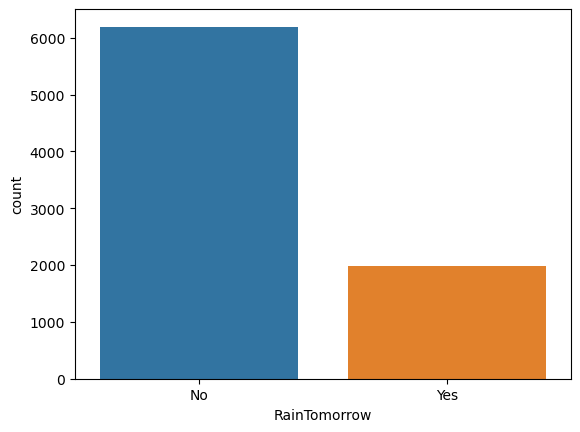

In [187]:
sns.countplot(x="RainTomorrow",data=df)

In [188]:
df["RainTomorrow"].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [189]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [190]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

# Numerical feature

In [191]:
Numerical_feature=[i for i in df.columns if df[i].dtypes!='O']
Numerical_feature
#len(Numerical_feature)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

# Discrete feature

In [192]:
Discrete_feature=[i for i in Numerical_feature if len(df[i].unique())<25]
Discrete_feature
#len(Discrete_feature)

['Cloud9am', 'Cloud3pm']

# Continous feature

In [193]:
Continous_feature=[i for i in Numerical_feature if i not in Discrete_feature]
Continous_feature
#len(Continous_feature)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


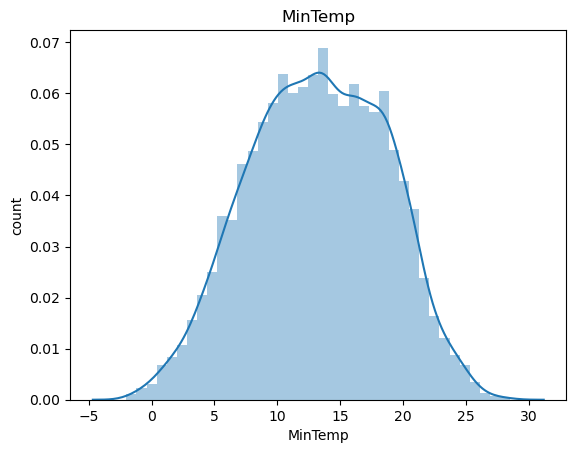

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


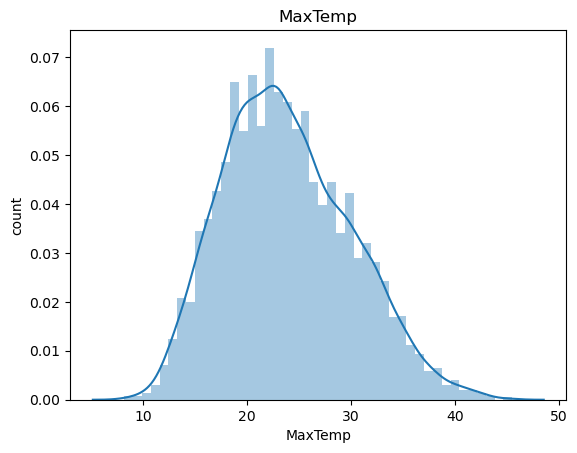

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


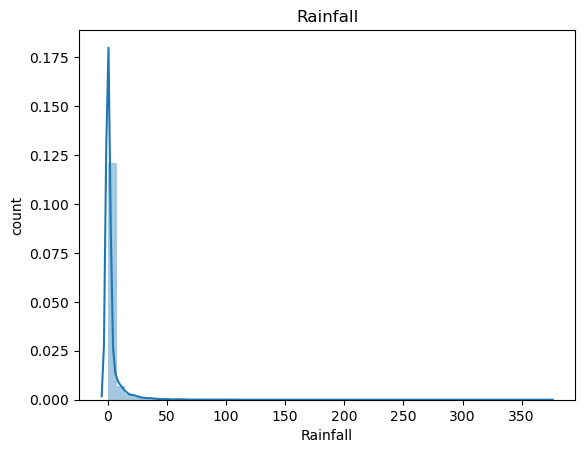

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


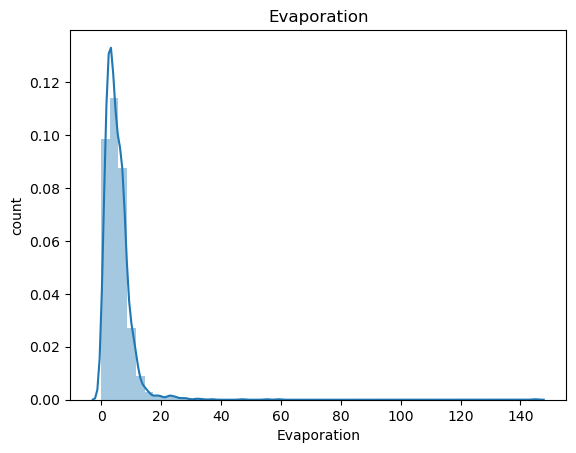

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


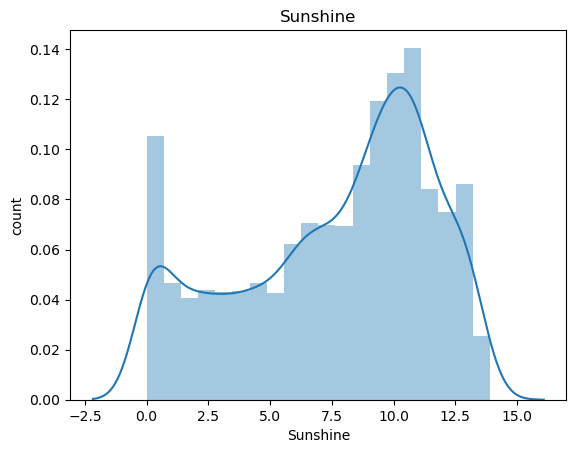

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


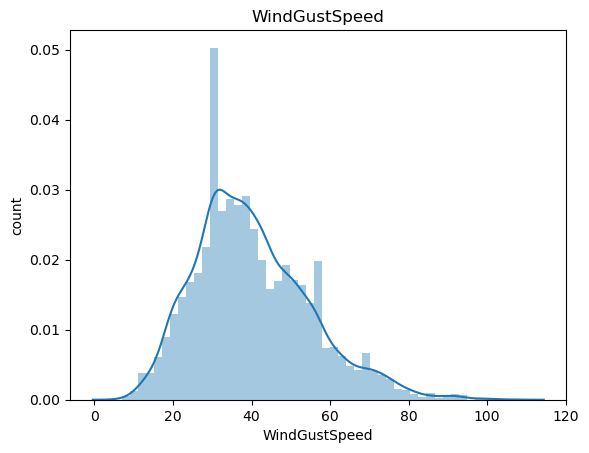

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


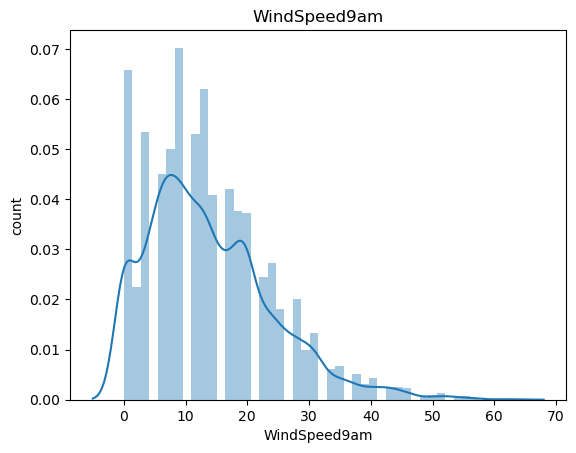

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


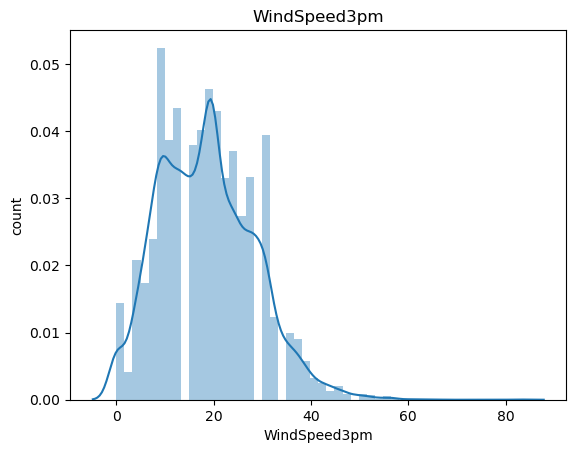

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


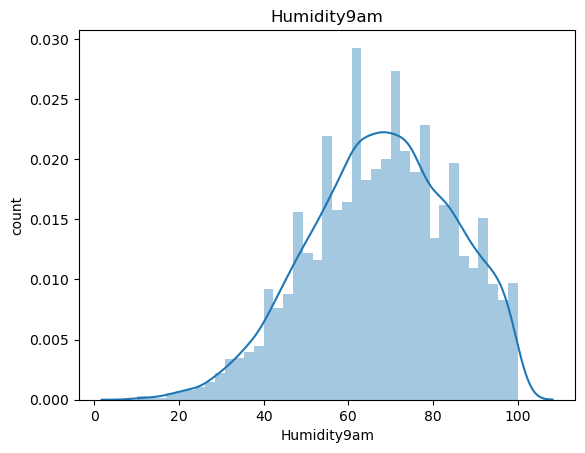

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


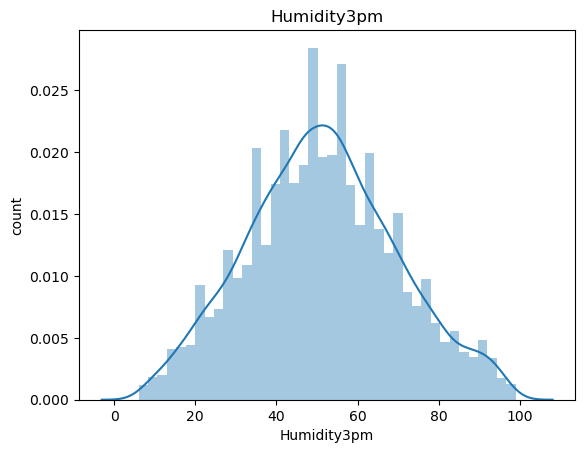

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


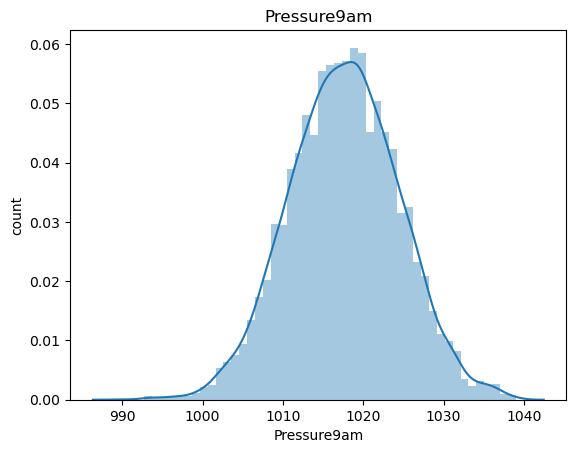

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


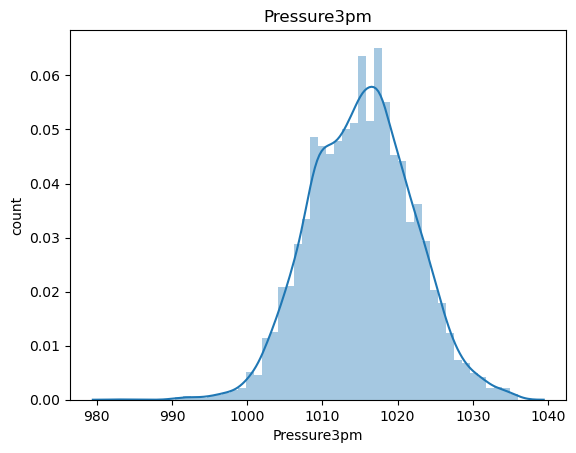

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


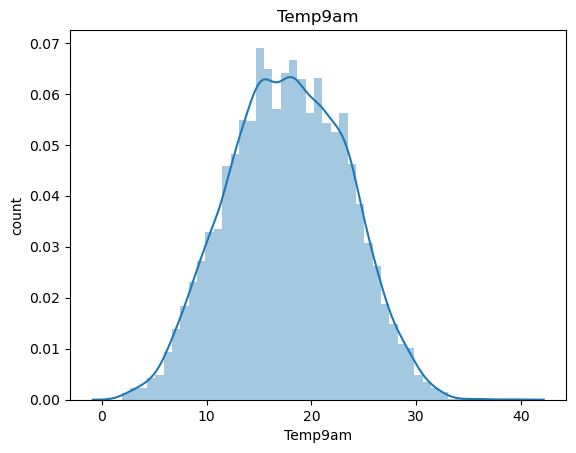

<Figure size 1500x1500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\43334676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


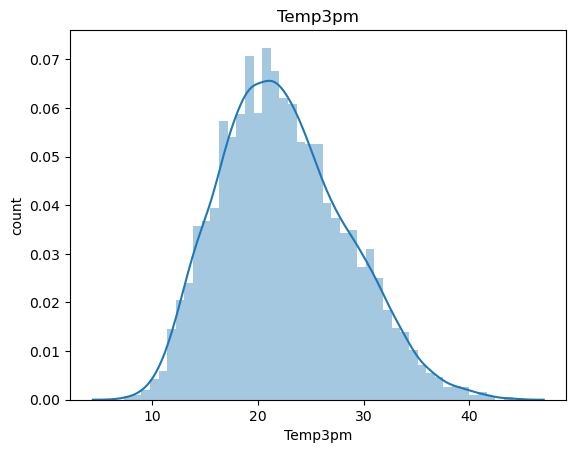

<Figure size 1500x1500 with 0 Axes>

In [194]:
for i in Continous_feature:
    data=df.copy
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title(i)
    plt.figure(figsize=(15,15))
    plt.show()
    

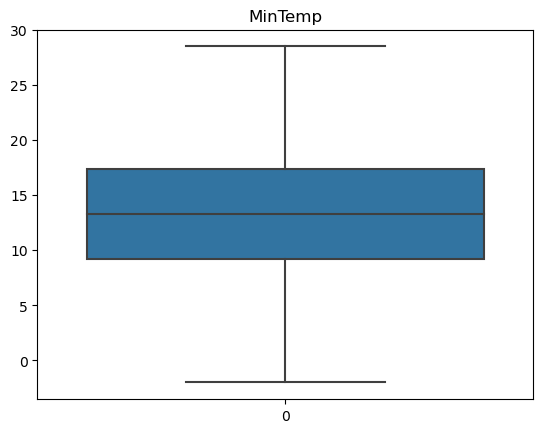

<Figure size 1500x1500 with 0 Axes>

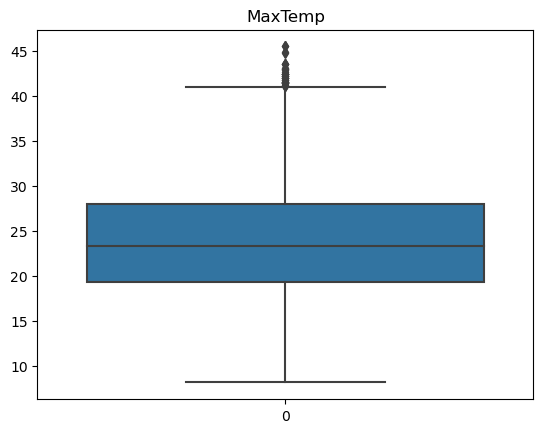

<Figure size 1500x1500 with 0 Axes>

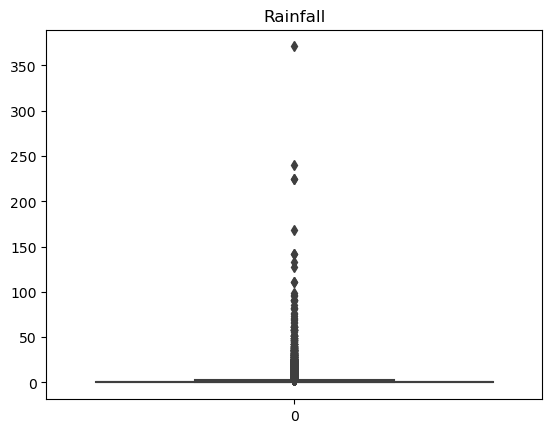

<Figure size 1500x1500 with 0 Axes>

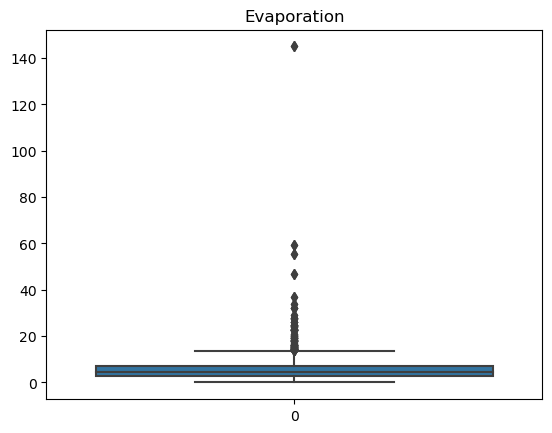

<Figure size 1500x1500 with 0 Axes>

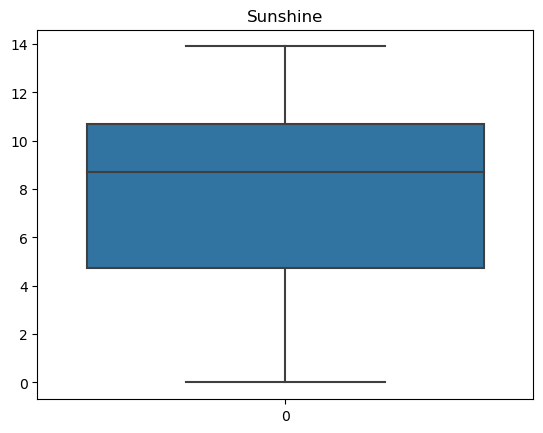

<Figure size 1500x1500 with 0 Axes>

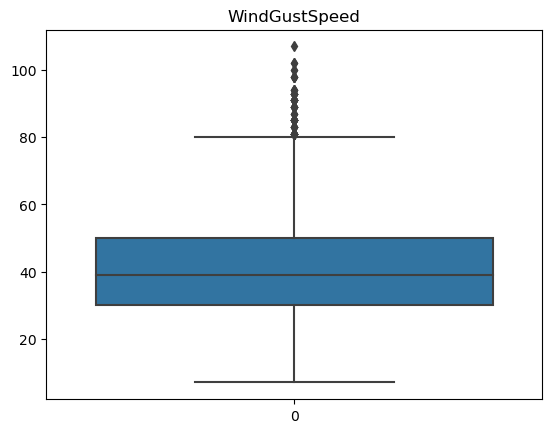

<Figure size 1500x1500 with 0 Axes>

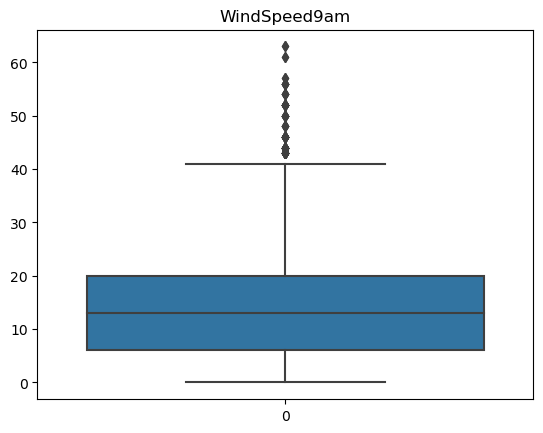

<Figure size 1500x1500 with 0 Axes>

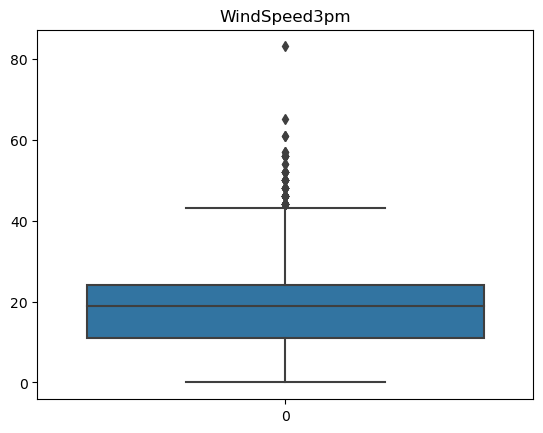

<Figure size 1500x1500 with 0 Axes>

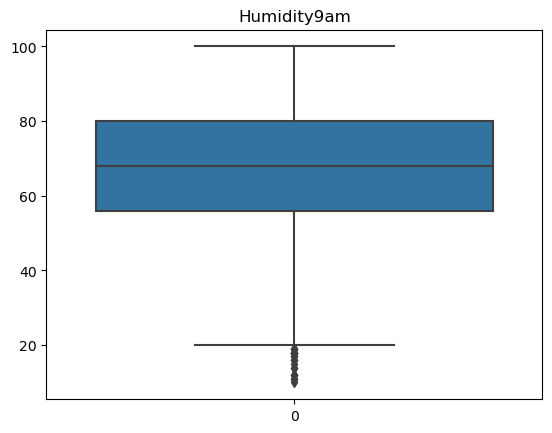

<Figure size 1500x1500 with 0 Axes>

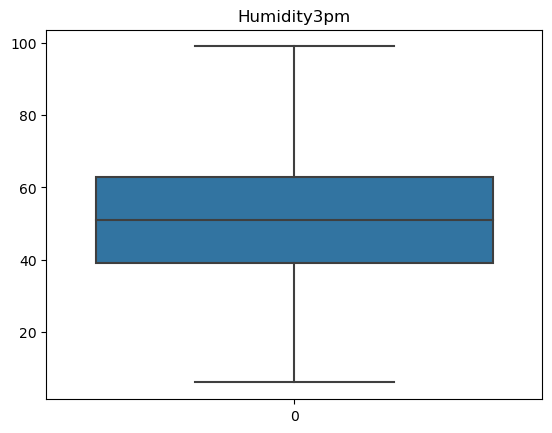

<Figure size 1500x1500 with 0 Axes>

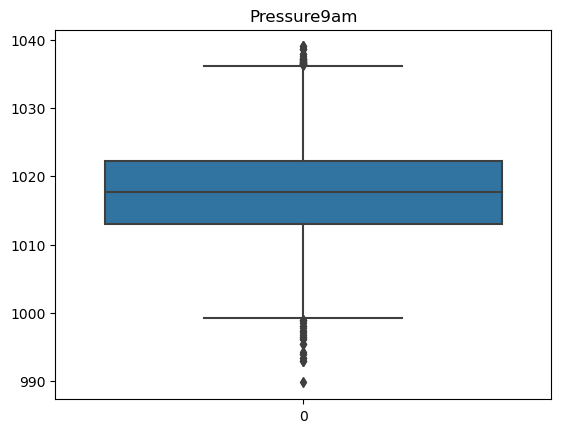

<Figure size 1500x1500 with 0 Axes>

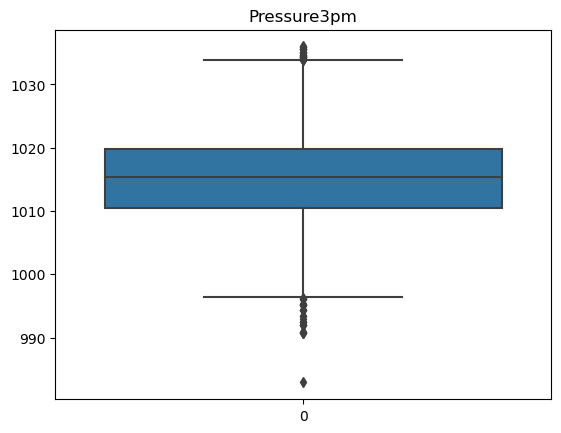

<Figure size 1500x1500 with 0 Axes>

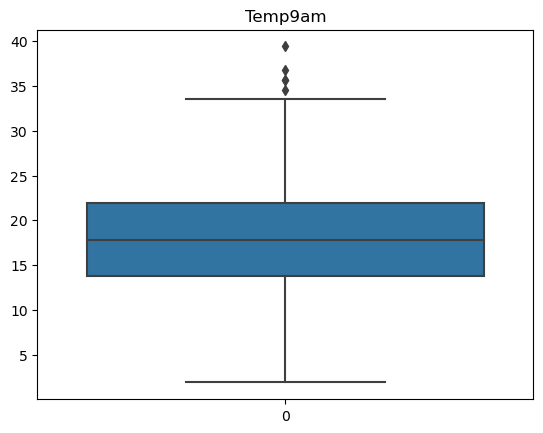

<Figure size 1500x1500 with 0 Axes>

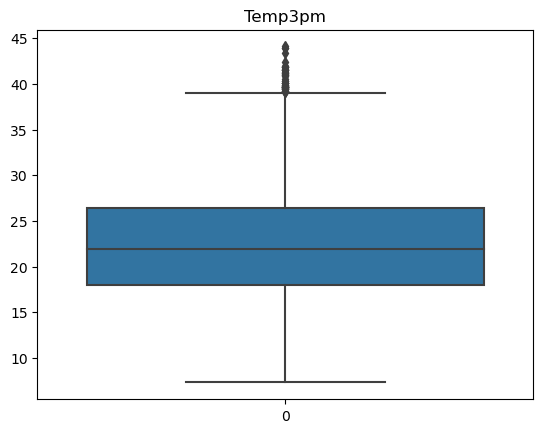

<Figure size 1500x1500 with 0 Axes>

In [148]:
for i in Continous_feature:
    data=df.copy
    sns.boxplot(df[i])
    plt.title(i)
    plt.figure(figsize=(15,15))
    plt.show()

# Categorical feature

In [150]:
Categorical_feature=[i for i in df.columns  if i not in Numerical_feature]
Categorical_feature
#len(Categorical_feature)

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [196]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [247]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      41.673591
Sunshine         47.394659
WindGustDir       0.000000
WindGustSpeed    11.762611
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.127596
Temp9am           0.664688
Temp3pm           1.139466
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [240]:
df["MinTemp"].fillna(df["MinTemp"].mean(),inplace=True)

In [241]:
df["MaxTemp"].fillna(df["MaxTemp"].mean(),inplace=True)

In [246]:
df["Rainfall"].fillna(df["Rainfall"].mean(),inplace=True)

In [250]:
df["Evaporation"].fillna(df["Evaporation"].mean(),inplace=True)

In [252]:
df["Sunshine"].fillna(df["Sunshine"].mean(),inplace=True)

In [254]:
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(),inplace=True)

In [260]:
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(),inplace=True)

In [262]:
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(),inplace=True)

In [258]:
df["Humidity9am"].fillna(df["Humidity9am"].mean(),inplace=True)

In [264]:
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(),inplace=True)

In [265]:
df["Pressure9am"].fillna(df["Pressure9am"].mean(),inplace=True)

In [267]:
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(),inplace=True)

In [268]:
df["Cloud9am"].fillna(df["Cloud9am"].mean(),inplace=True)

In [269]:
df["Cloud3pm"].fillna(df["Cloud3pm"].mean(),inplace=True)

In [270]:
df["Temp9am"].fillna(df["Temp9am"].mean(),inplace=True)

In [271]:
df["Temp3pm"].fillna(df["Temp3pm"].mean(),inplace=True)

In [353]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Date_month       0.0
Date_day         0.0
Date_year        0.0
dtype: float64

In [273]:
Categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
df["Location"]= LabelEncoder().fit_transform(df["Location"])
df["WindGustDir"]= LabelEncoder().fit_transform(df["WindGustDir"])
df["WindDir9am"]= LabelEncoder().fit_transform(df["WindDir9am"])
df["WindDir3pm"]= LabelEncoder().fit_transform(df["WindDir3pm"])
df["RainToday"]= LabelEncoder().fit_transform(df["RainToday"])
df["RainTomorrow"]= LabelEncoder().fit_transform(df["RainTomorrow"])

In [354]:
df[Categorical_feature]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,1,13,13,14,0,0
1,2008-12-02,1,14,6,15,0,0
2,2008-12-03,1,15,13,15,0,0
3,2008-12-04,1,4,9,0,0,0
4,2008-12-05,1,13,1,7,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,9,0,9,1,0,0
8421,2017-06-22,9,6,9,3,0,0
8422,2017-06-23,9,3,9,14,0,0
8423,2017-06-24,9,9,10,3,0,0


In [277]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [292]:
df["Date"]=pd.to_datetime(df['Date'],format = "%Y-%m-%dT",errors="coerce")

In [293]:
df["Date_month"]=df["Date"].dt.month

In [295]:
df["Date_day"]=df["Date"].dt.day

In [297]:
df["Date_year"]=df["Date"].dt.year

In [298]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day,Date_year
0,2008-12-01,1,13.4,22.9,0.6,4.000000,0.000000,13,44.0,13,...,1007.1,8.000000,7.000000,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.1,0.0,5.389113,7.630483,14,44.0,6,...,1007.8,4.566622,4.503601,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.7,0.0,5.389113,7.630483,15,46.0,13,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.0,0.0,5.389113,7.630483,4,24.0,9,...,1012.8,4.566622,4.503601,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.3,1.0,5.389113,7.630483,13,41.0,1,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6704\1894206888.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


<Axes: >

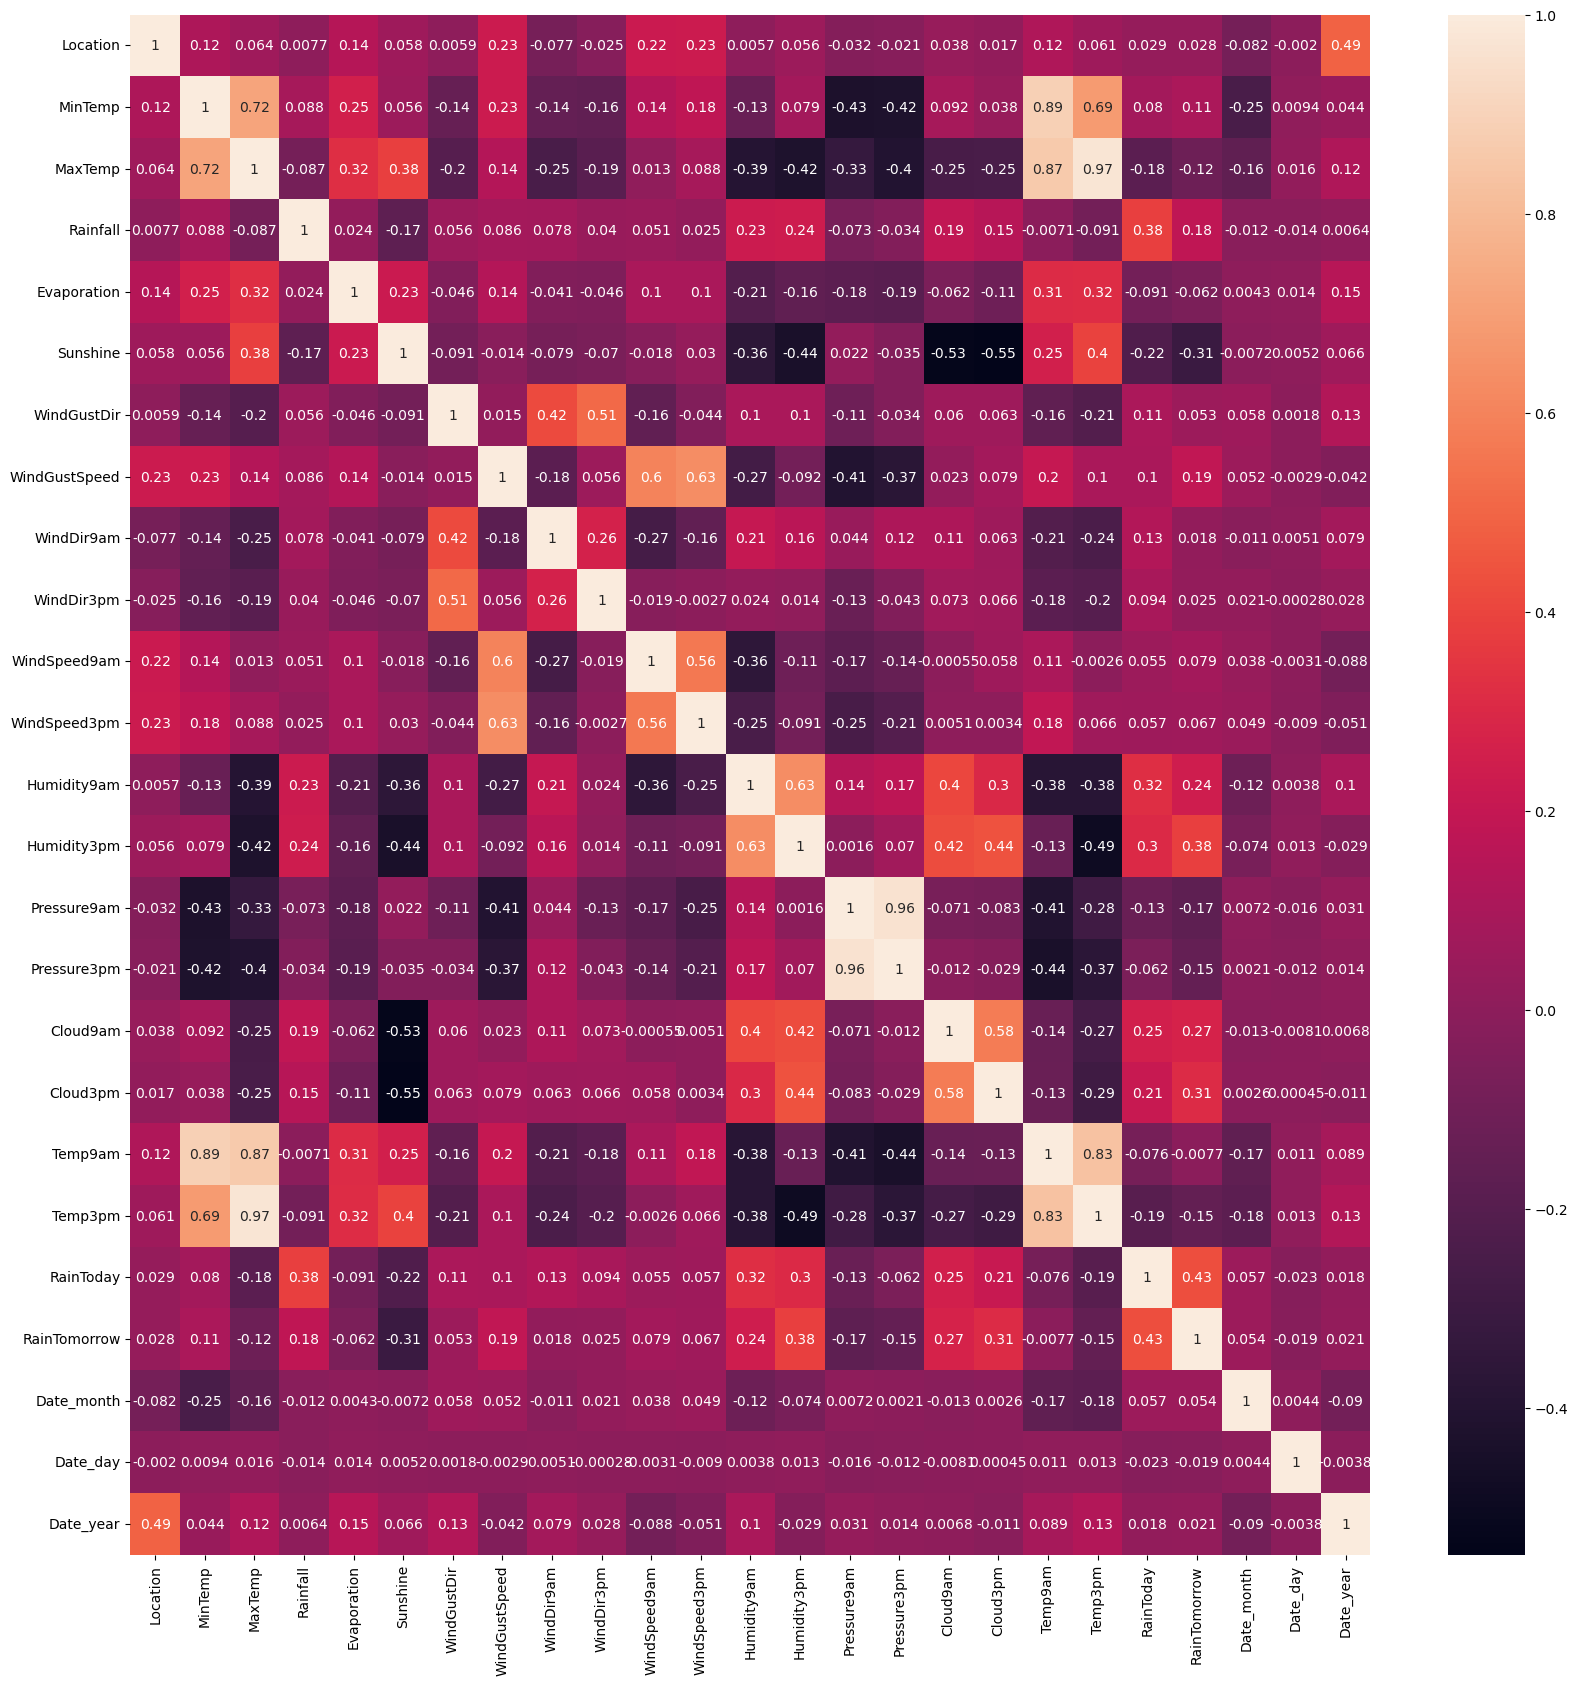

In [300]:
corrmat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

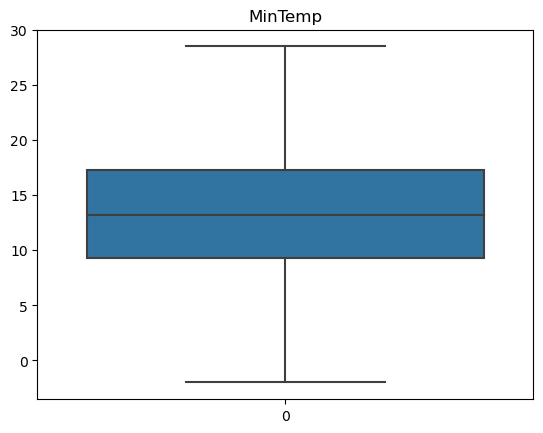

<Figure size 1500x1500 with 0 Axes>

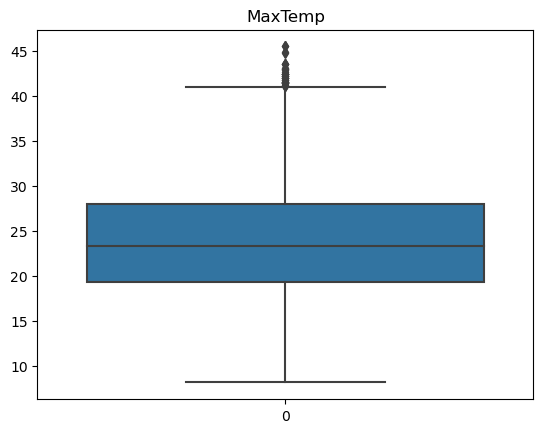

<Figure size 1500x1500 with 0 Axes>

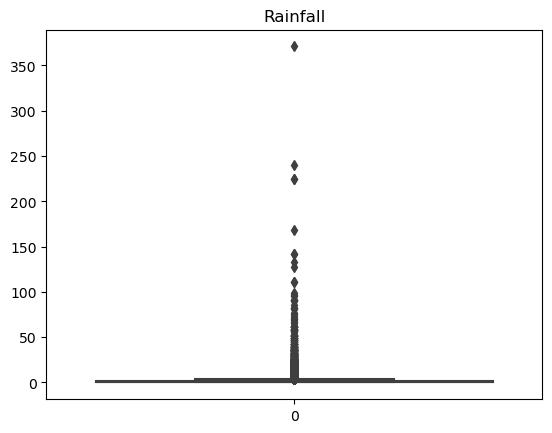

<Figure size 1500x1500 with 0 Axes>

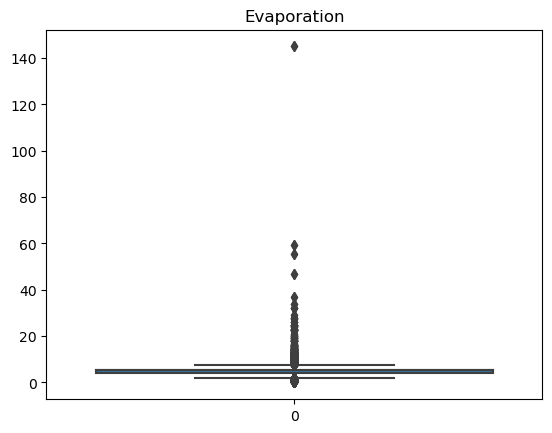

<Figure size 1500x1500 with 0 Axes>

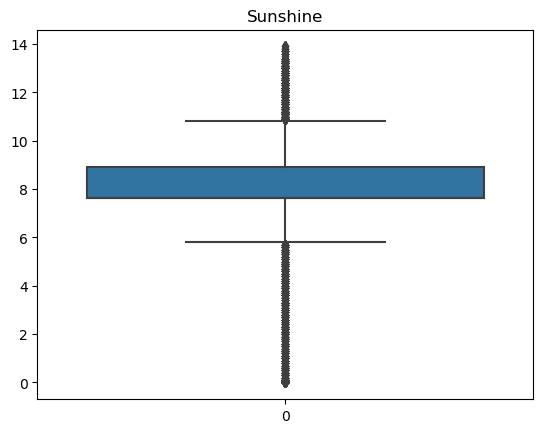

<Figure size 1500x1500 with 0 Axes>

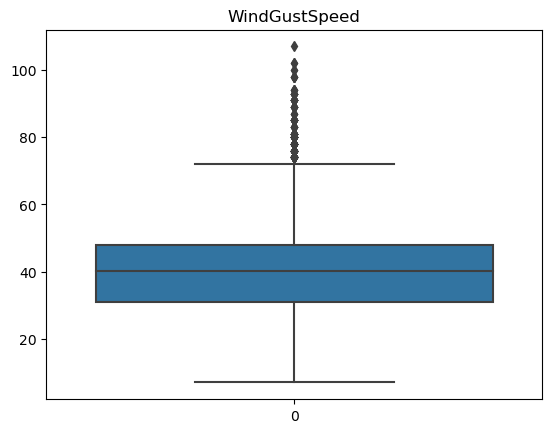

<Figure size 1500x1500 with 0 Axes>

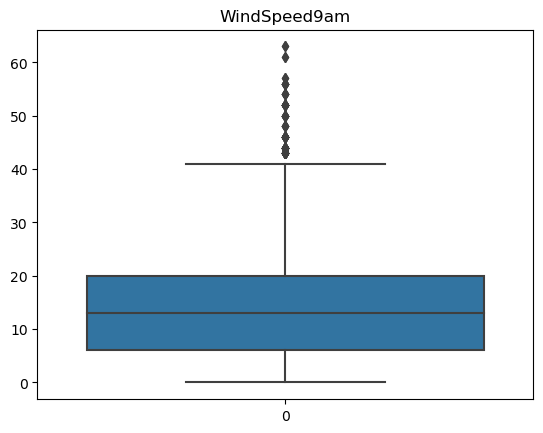

<Figure size 1500x1500 with 0 Axes>

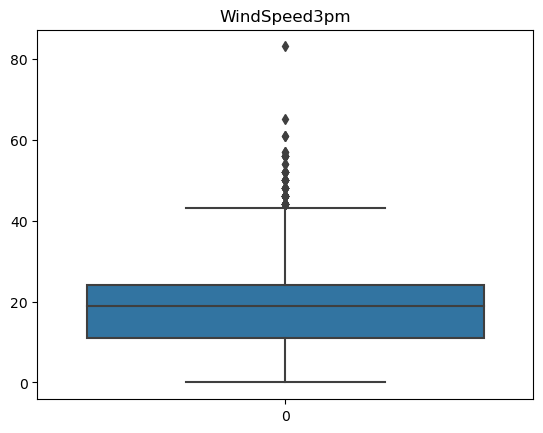

<Figure size 1500x1500 with 0 Axes>

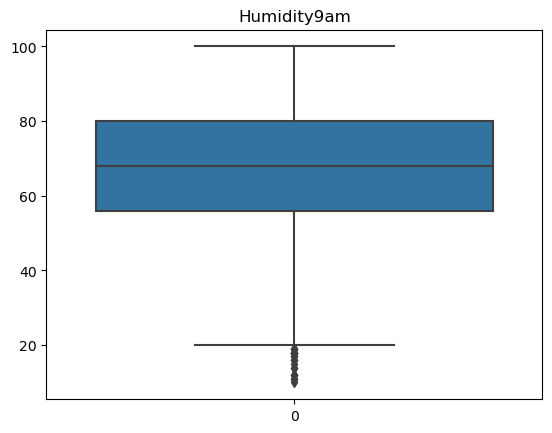

<Figure size 1500x1500 with 0 Axes>

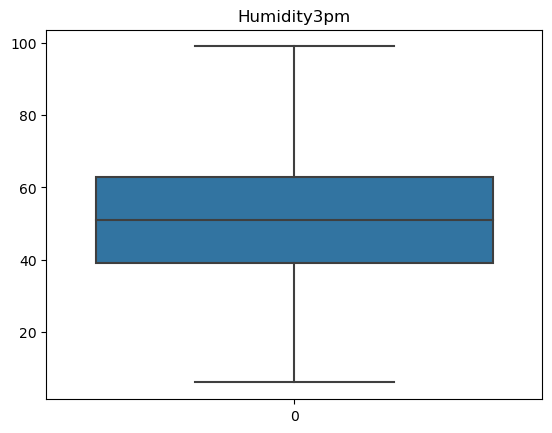

<Figure size 1500x1500 with 0 Axes>

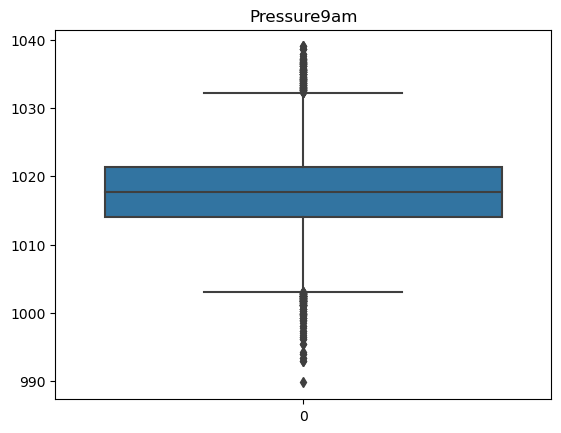

<Figure size 1500x1500 with 0 Axes>

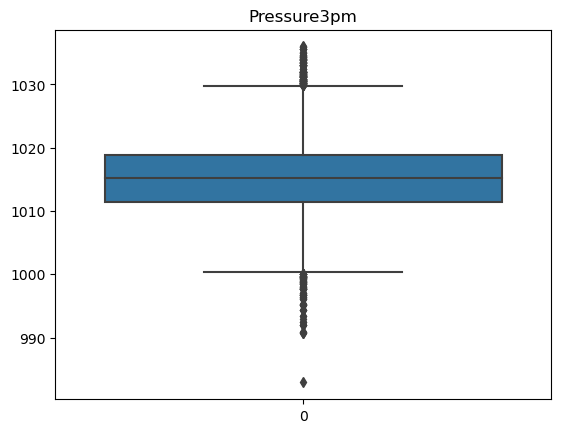

<Figure size 1500x1500 with 0 Axes>

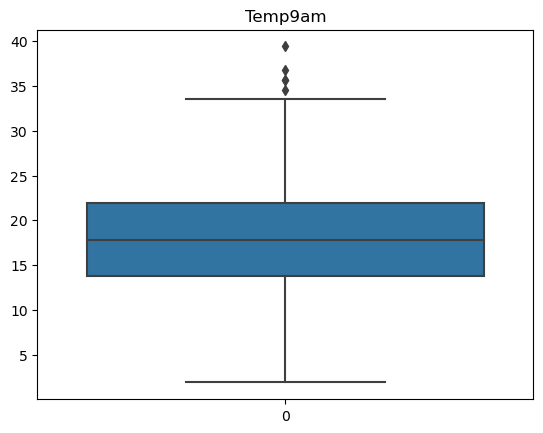

<Figure size 1500x1500 with 0 Axes>

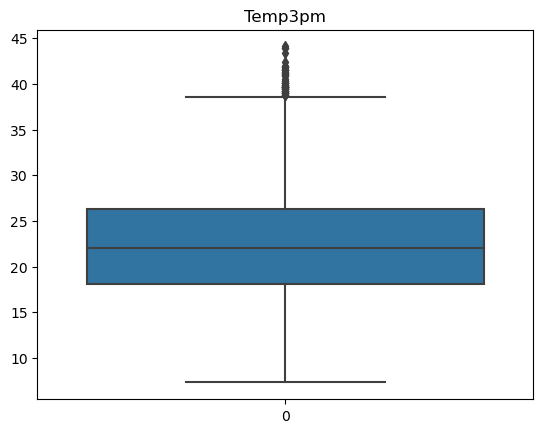

<Figure size 1500x1500 with 0 Axes>

In [301]:
for i in Continous_feature:
    data=df.copy
    sns.boxplot(df[i])
    plt.title(i)
    plt.figure(figsize=(15,15))
    plt.show()

In [313]:
Continous_feature=[i for i in Numerical_feature if i not in Discrete_feature]
Continous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [320]:
def outliars(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    
    #print lower bridge and upper bridge
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge



In [321]:
for i in Continous_feature:
    outliars(df,str(i))

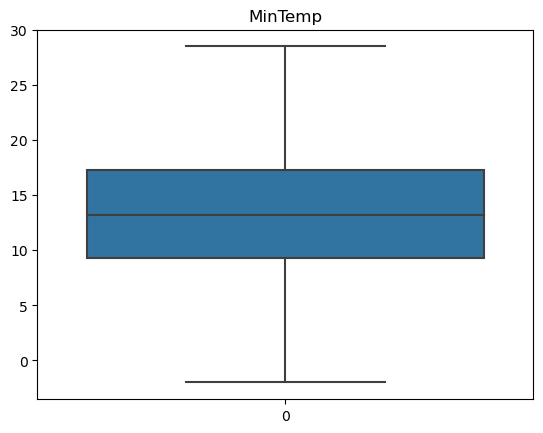

<Figure size 1500x1500 with 0 Axes>

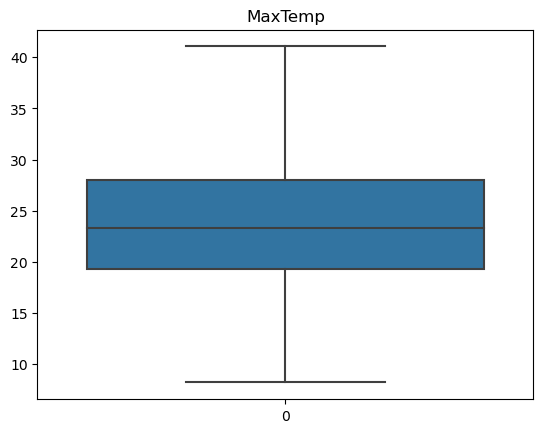

<Figure size 1500x1500 with 0 Axes>

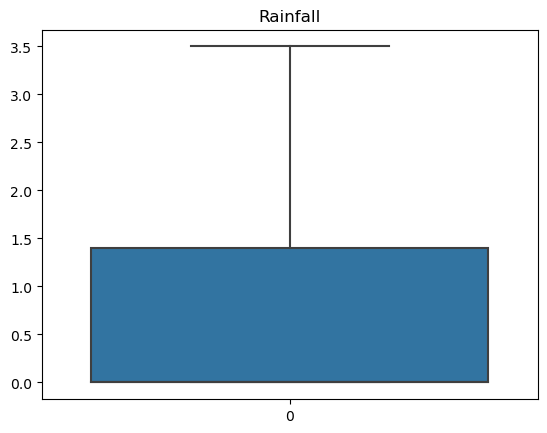

<Figure size 1500x1500 with 0 Axes>

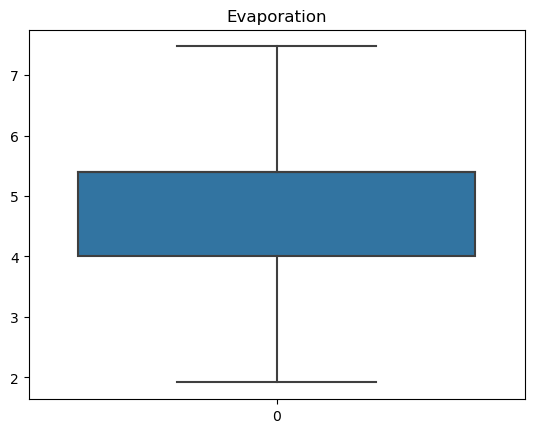

<Figure size 1500x1500 with 0 Axes>

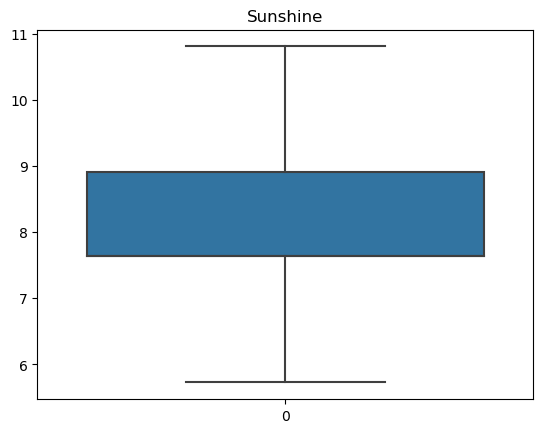

<Figure size 1500x1500 with 0 Axes>

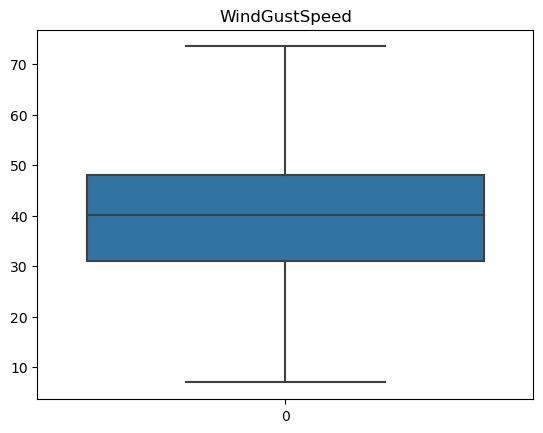

<Figure size 1500x1500 with 0 Axes>

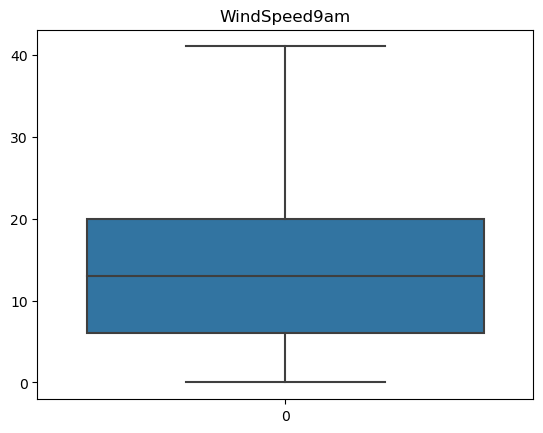

<Figure size 1500x1500 with 0 Axes>

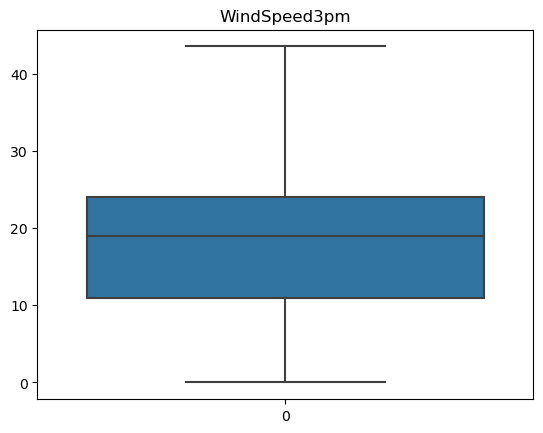

<Figure size 1500x1500 with 0 Axes>

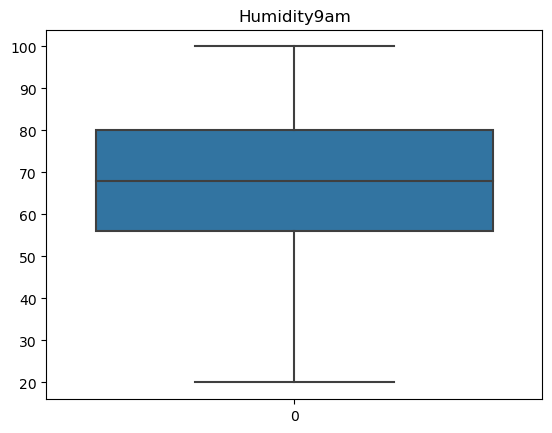

<Figure size 1500x1500 with 0 Axes>

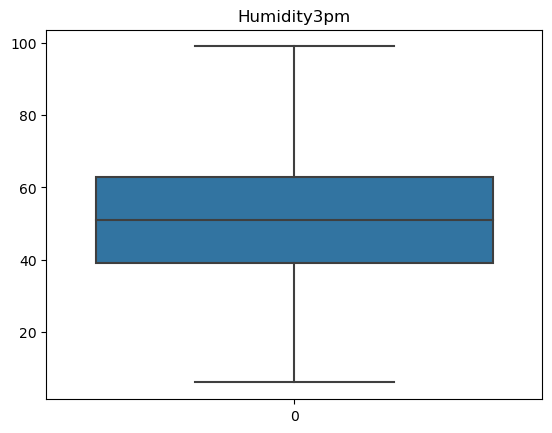

<Figure size 1500x1500 with 0 Axes>

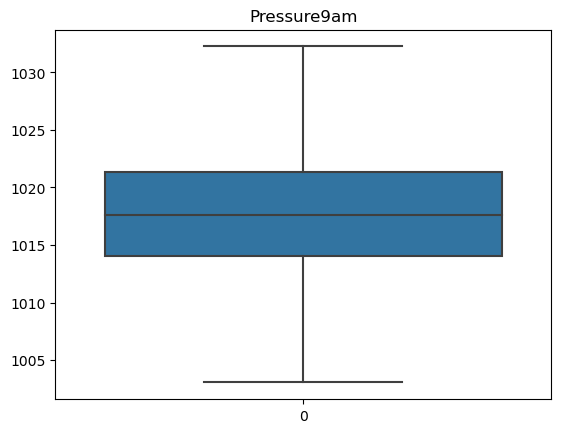

<Figure size 1500x1500 with 0 Axes>

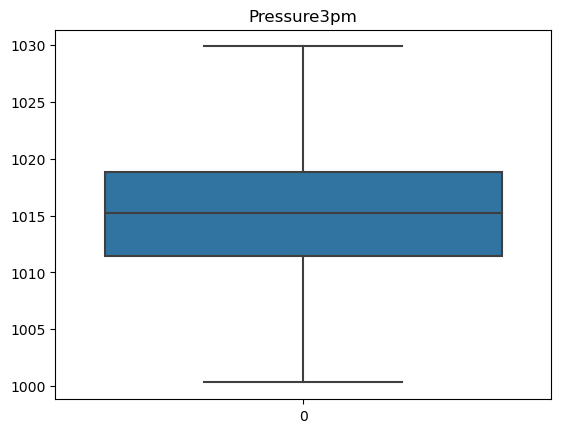

<Figure size 1500x1500 with 0 Axes>

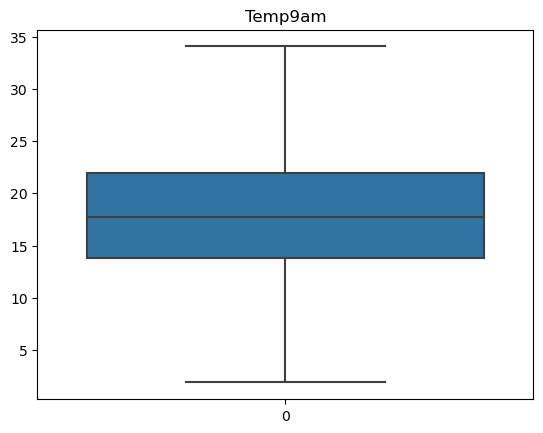

<Figure size 1500x1500 with 0 Axes>

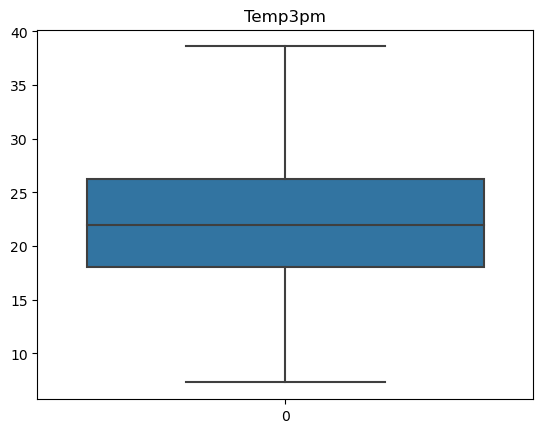

<Figure size 1500x1500 with 0 Axes>

In [322]:
for i in Continous_feature:
    data=df.copy
    sns.boxplot(df[i])
    plt.title(i)
    plt.figure(figsize=(15,15))
    plt.show()

# Data analysis

MinTemp


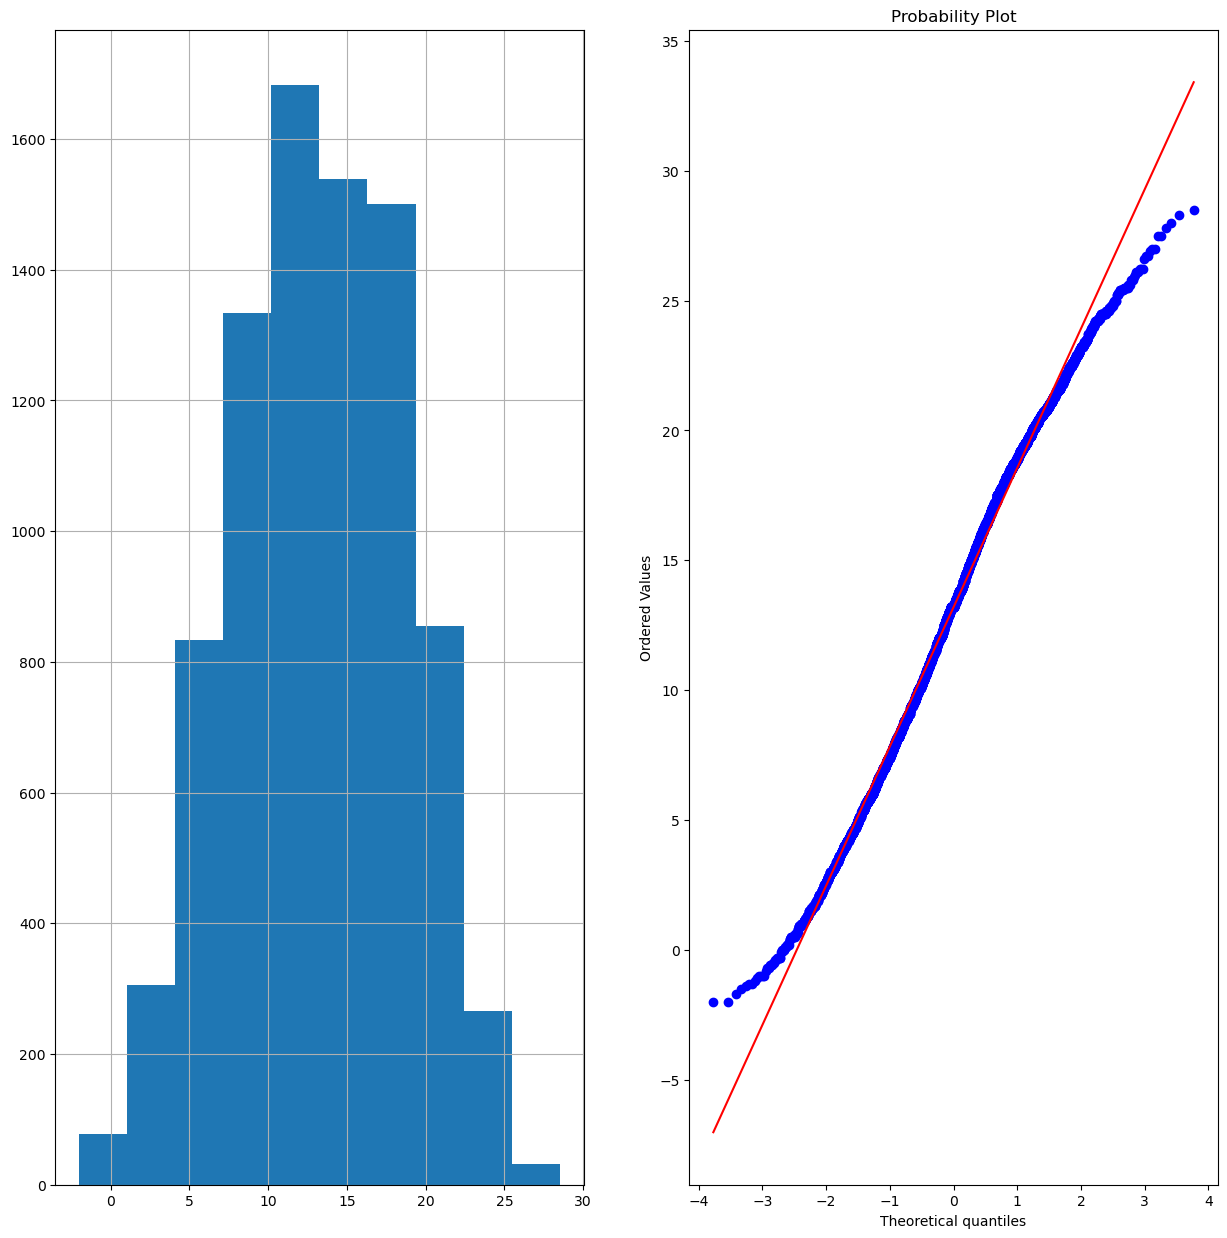

MaxTemp


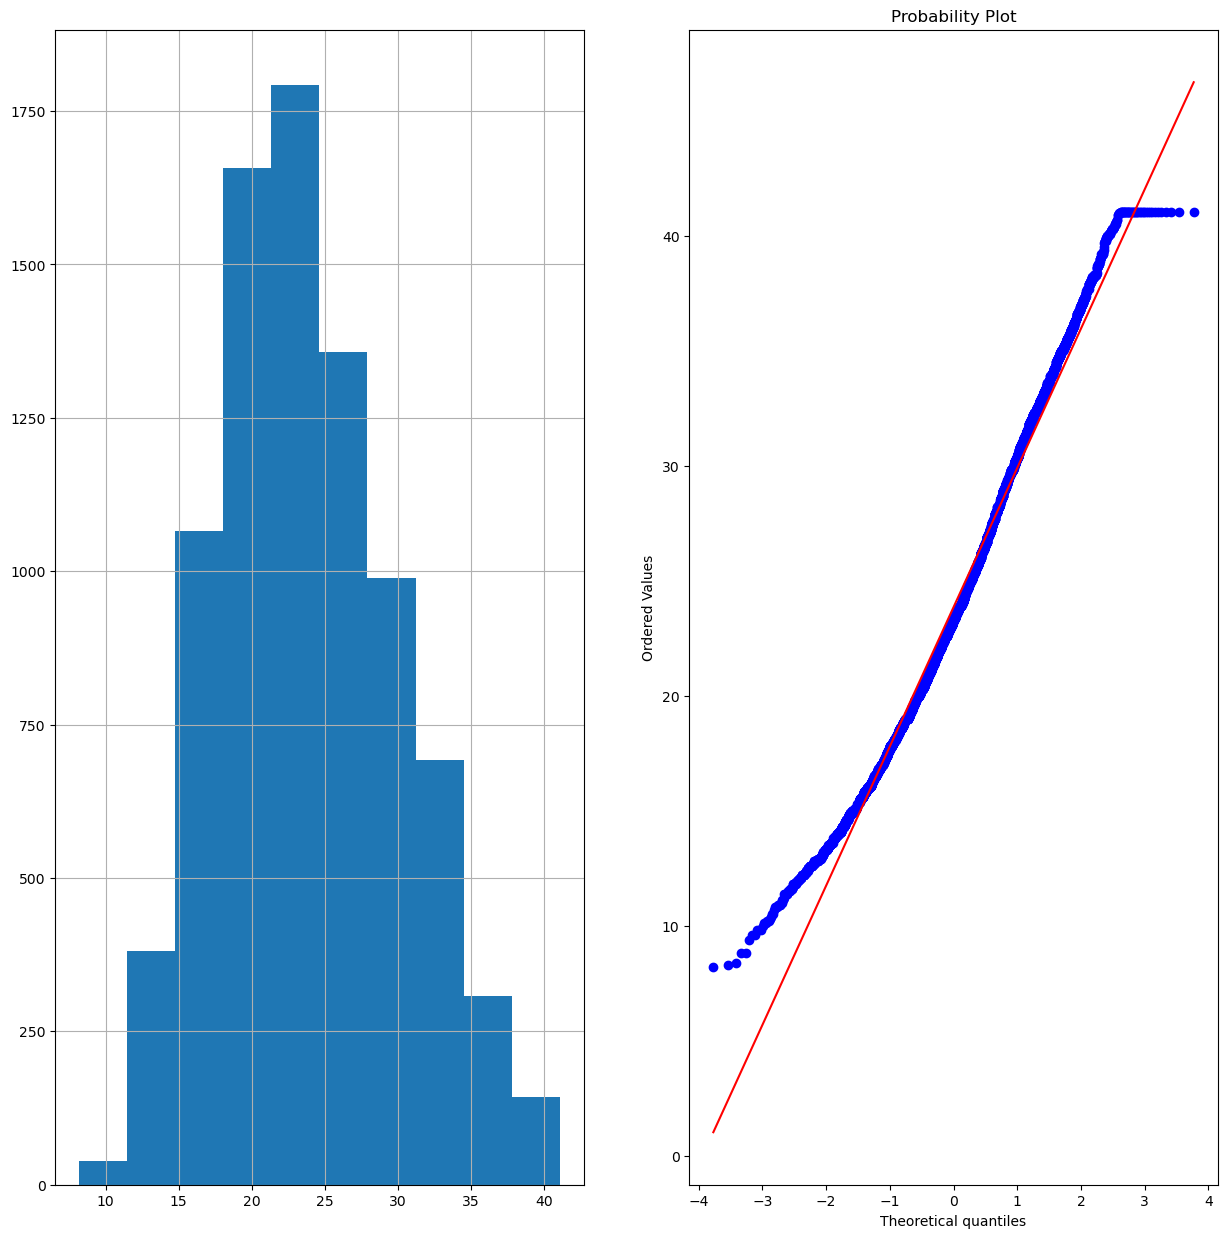

Rainfall


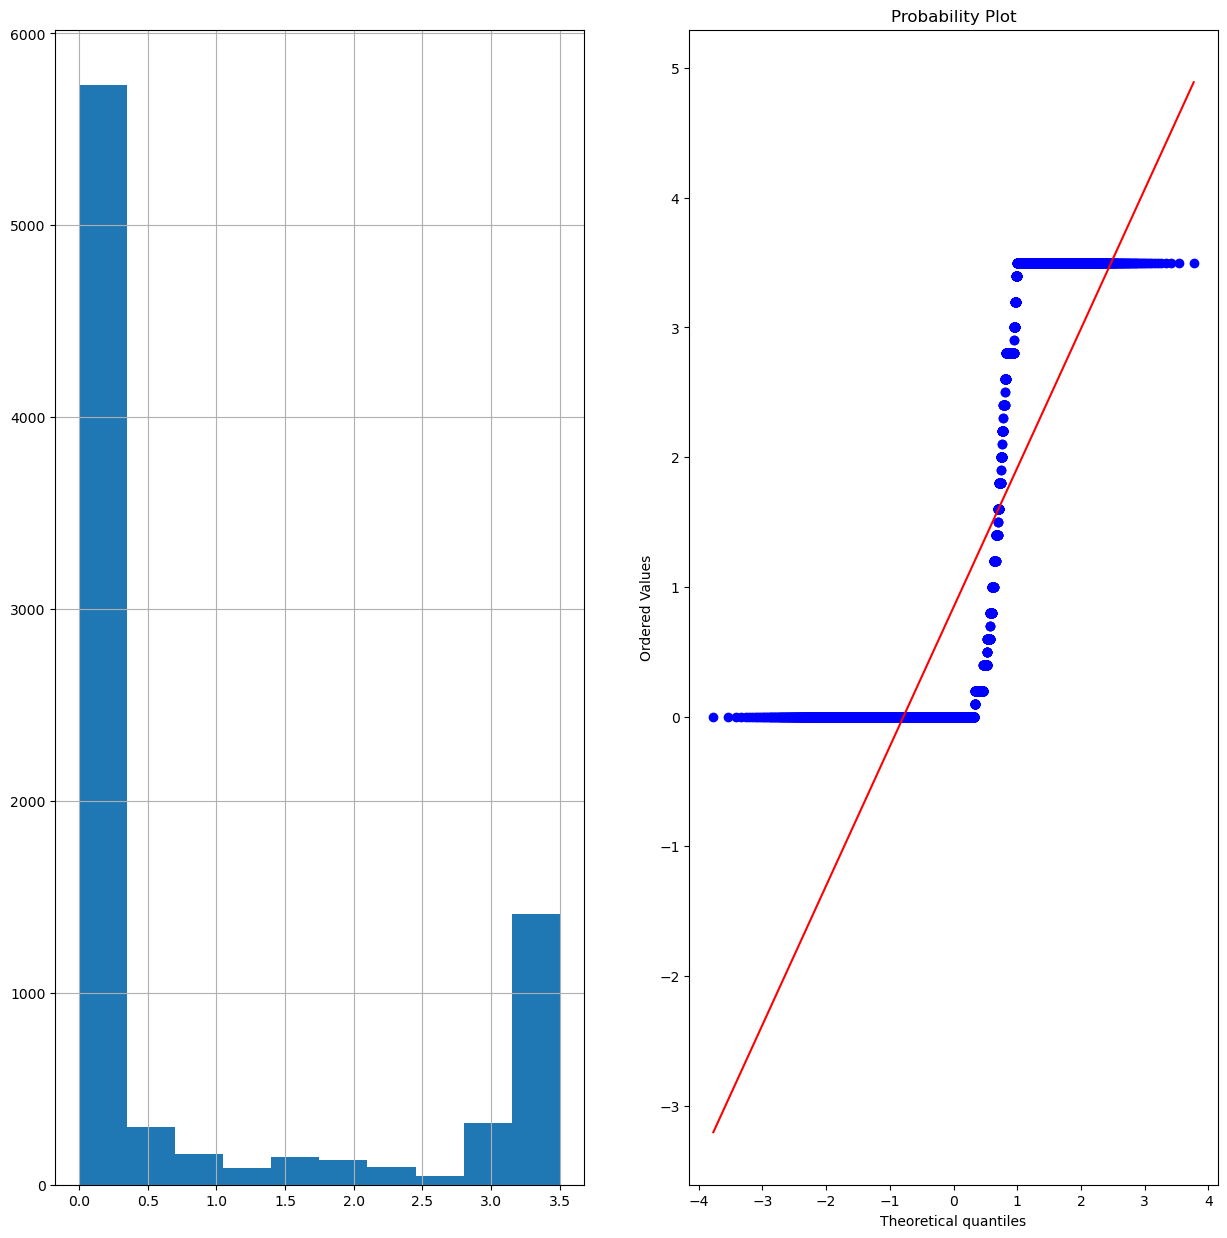

Evaporation


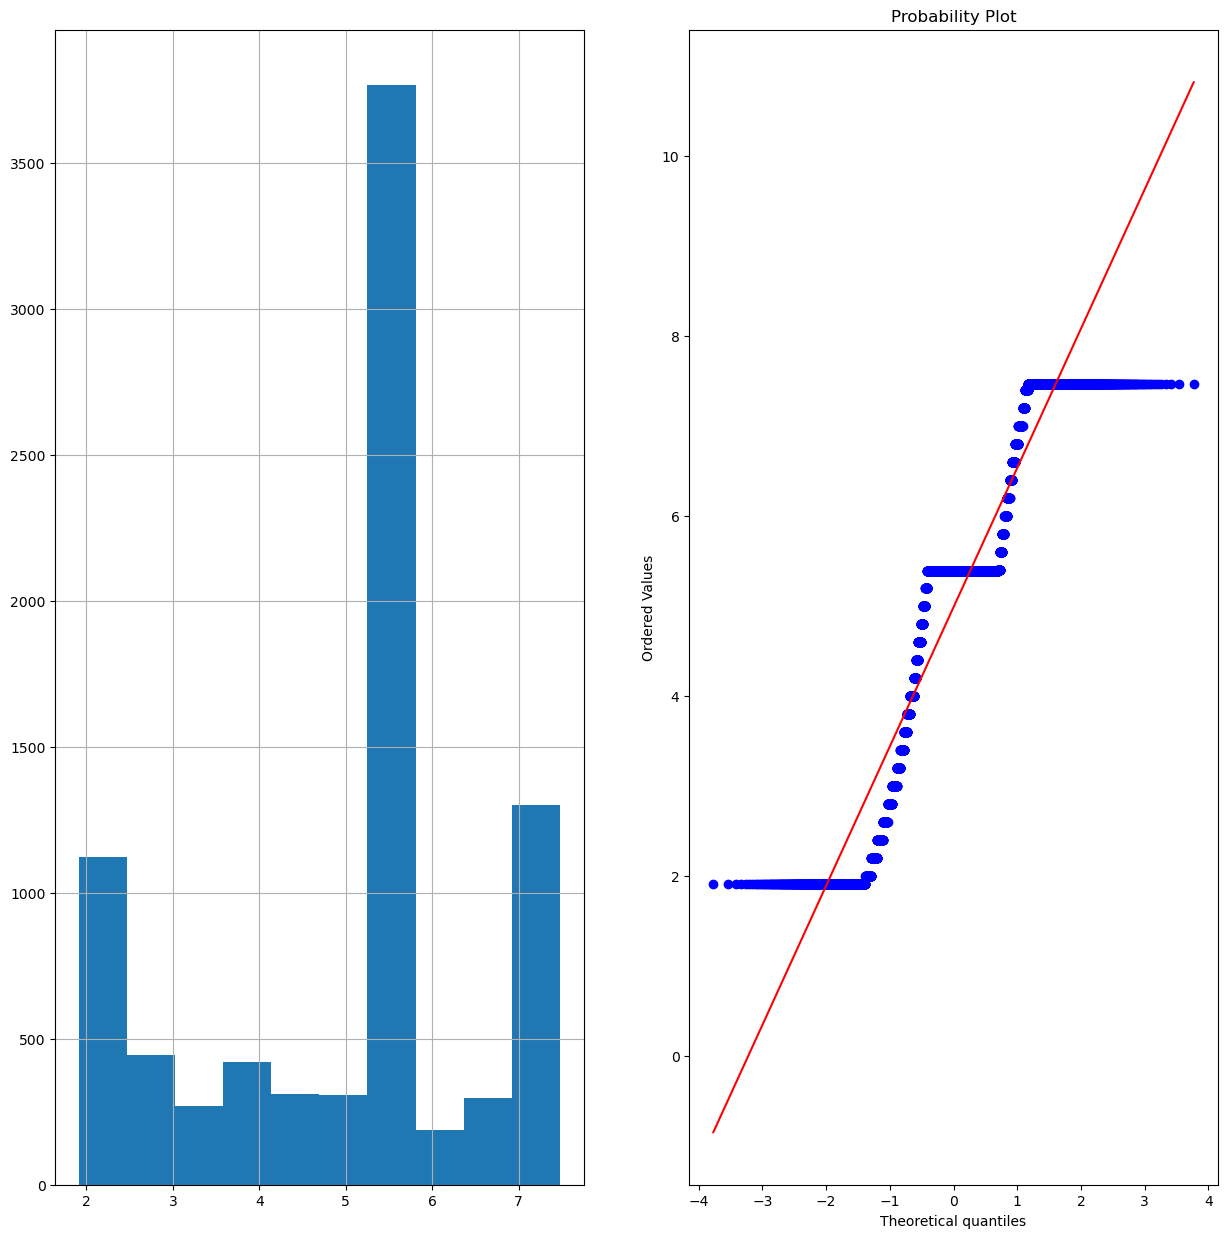

Sunshine


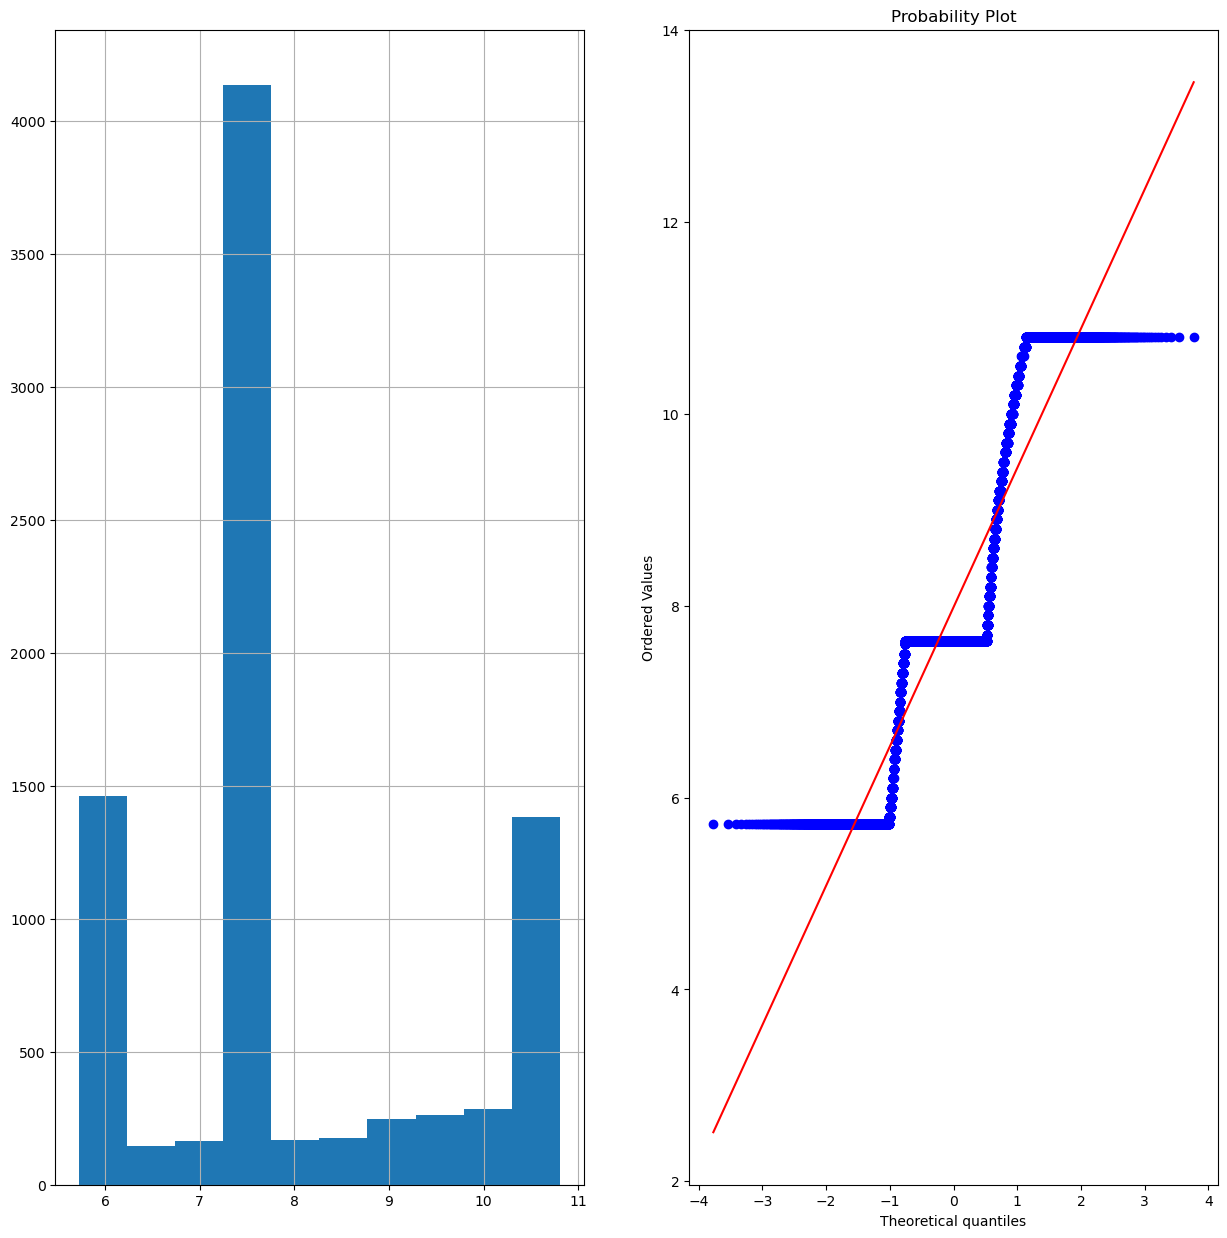

WindGustSpeed


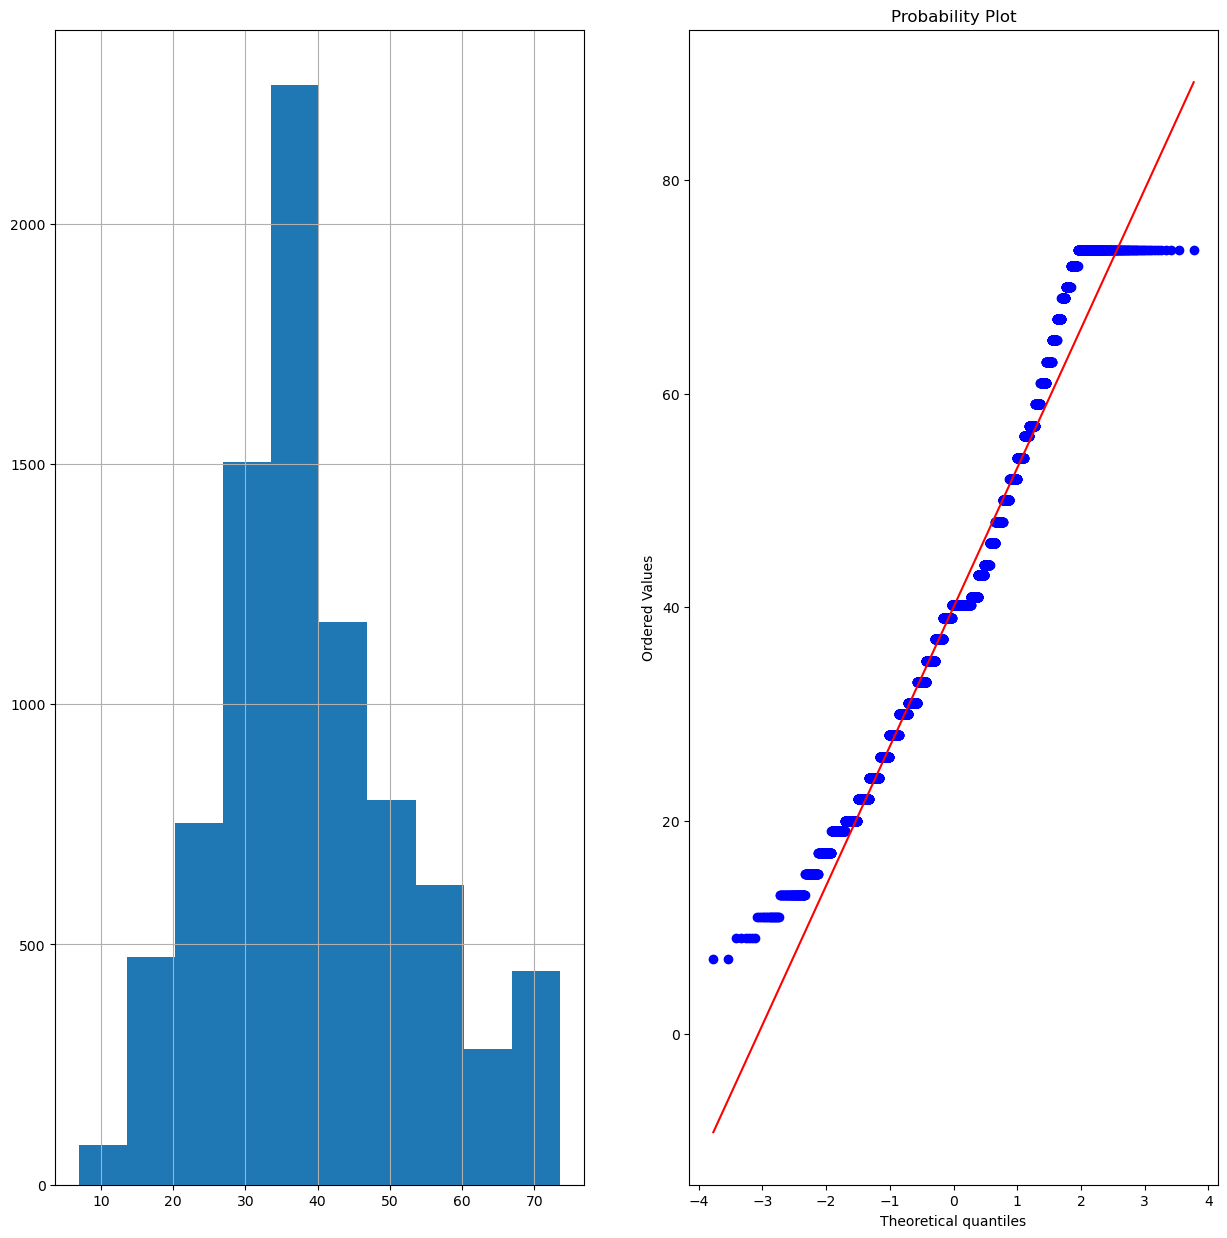

WindSpeed9am


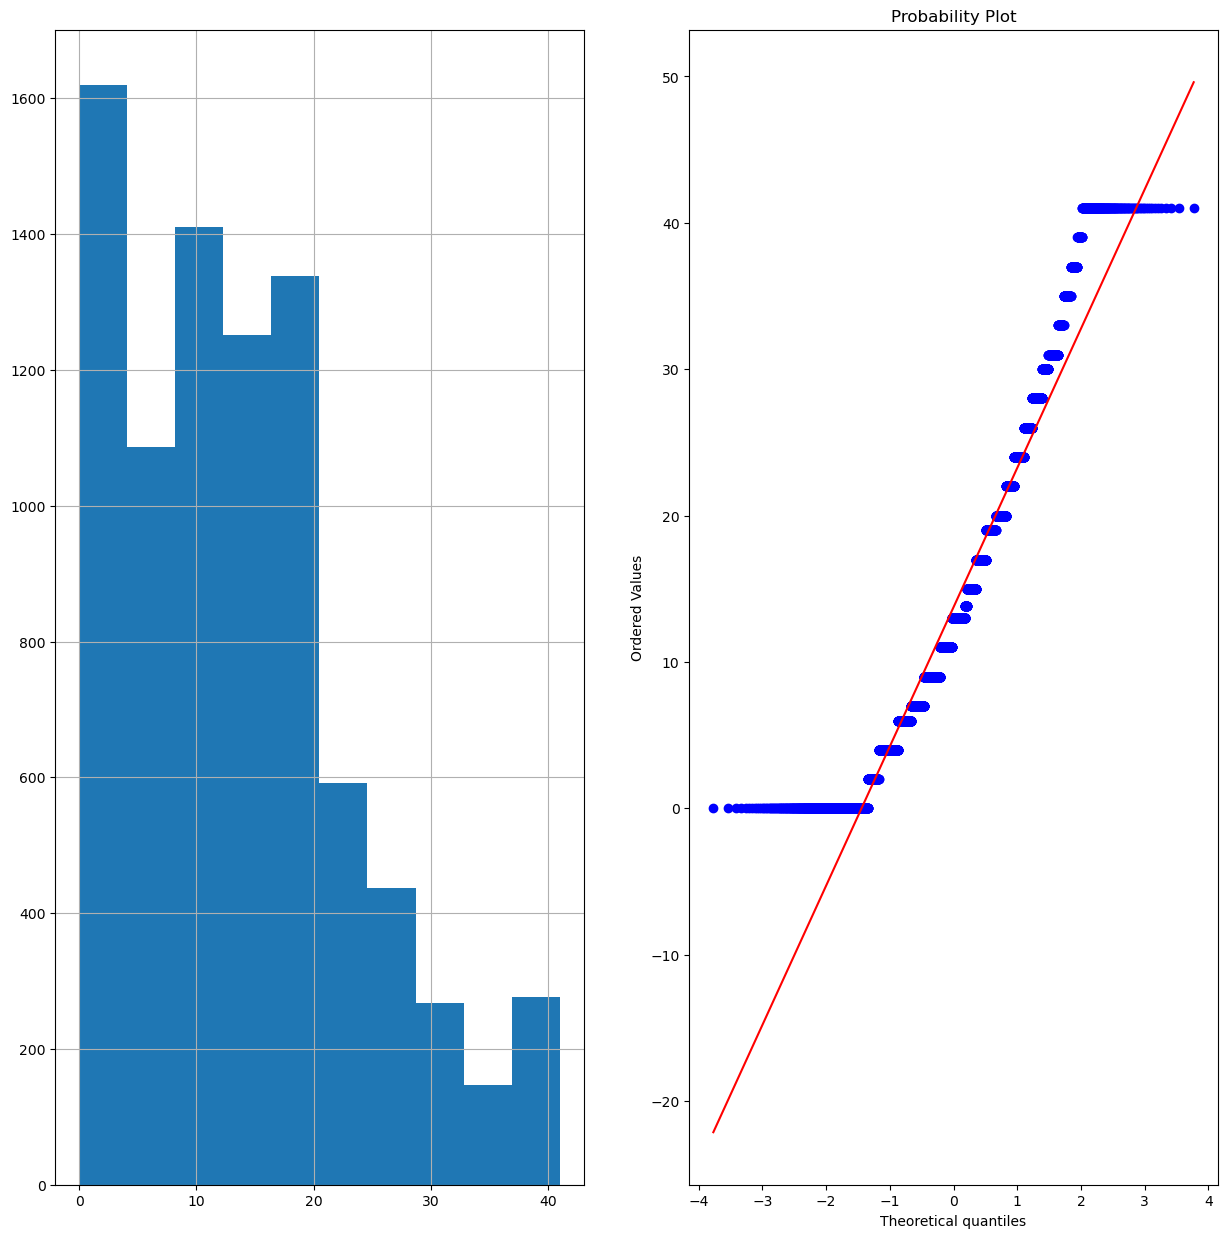

WindSpeed3pm


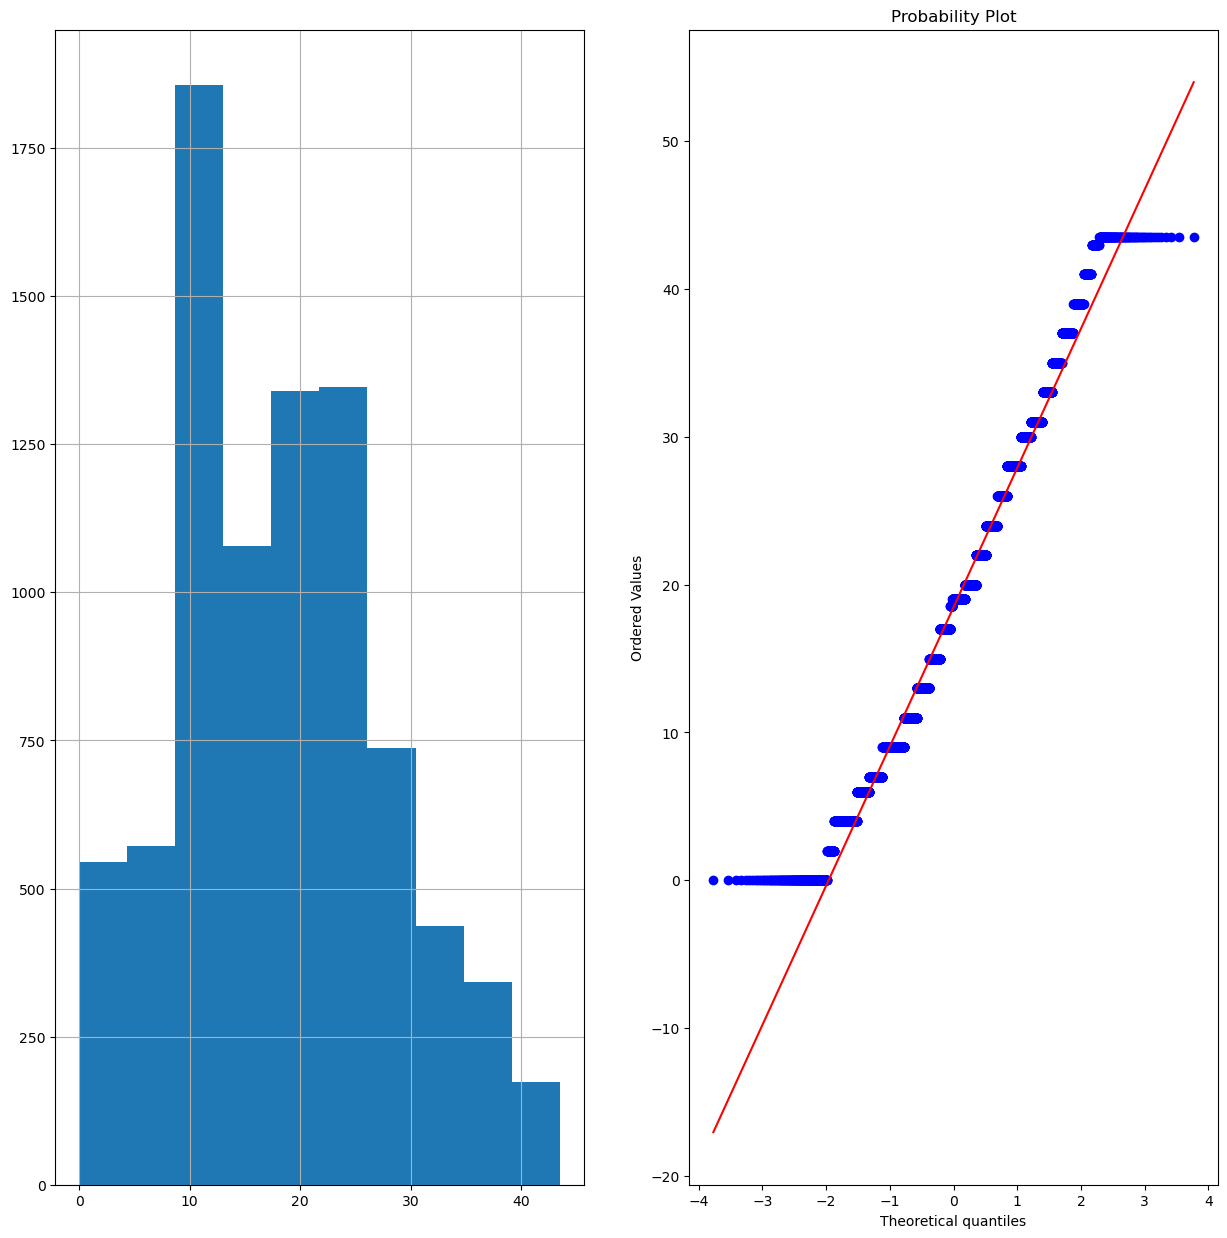

Humidity9am


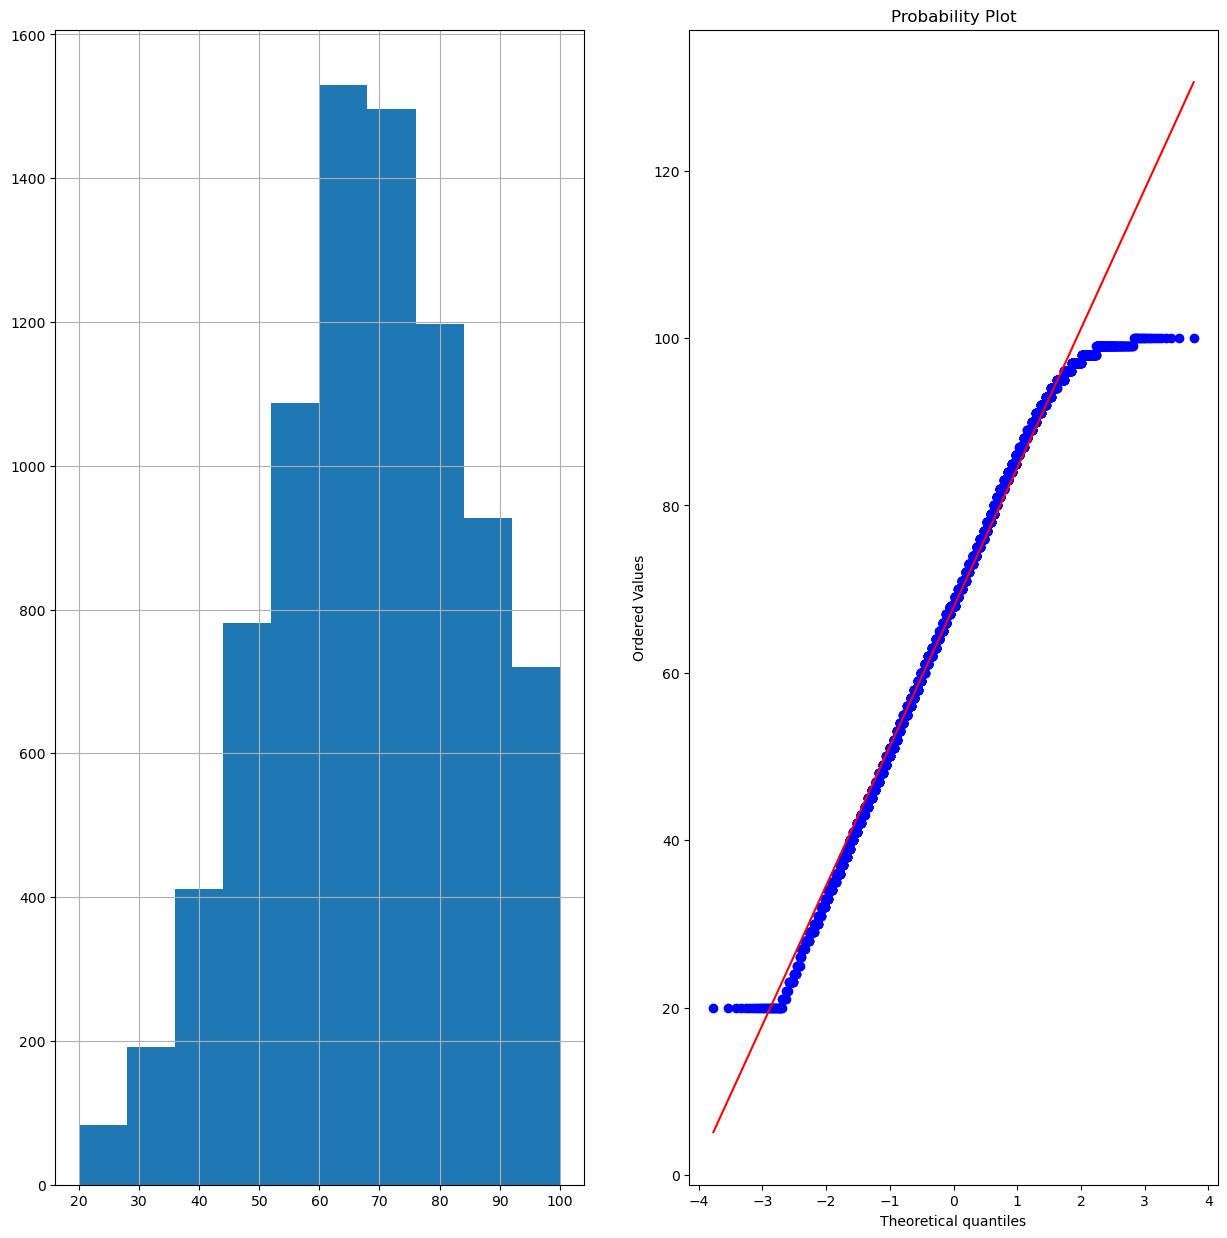

Humidity3pm


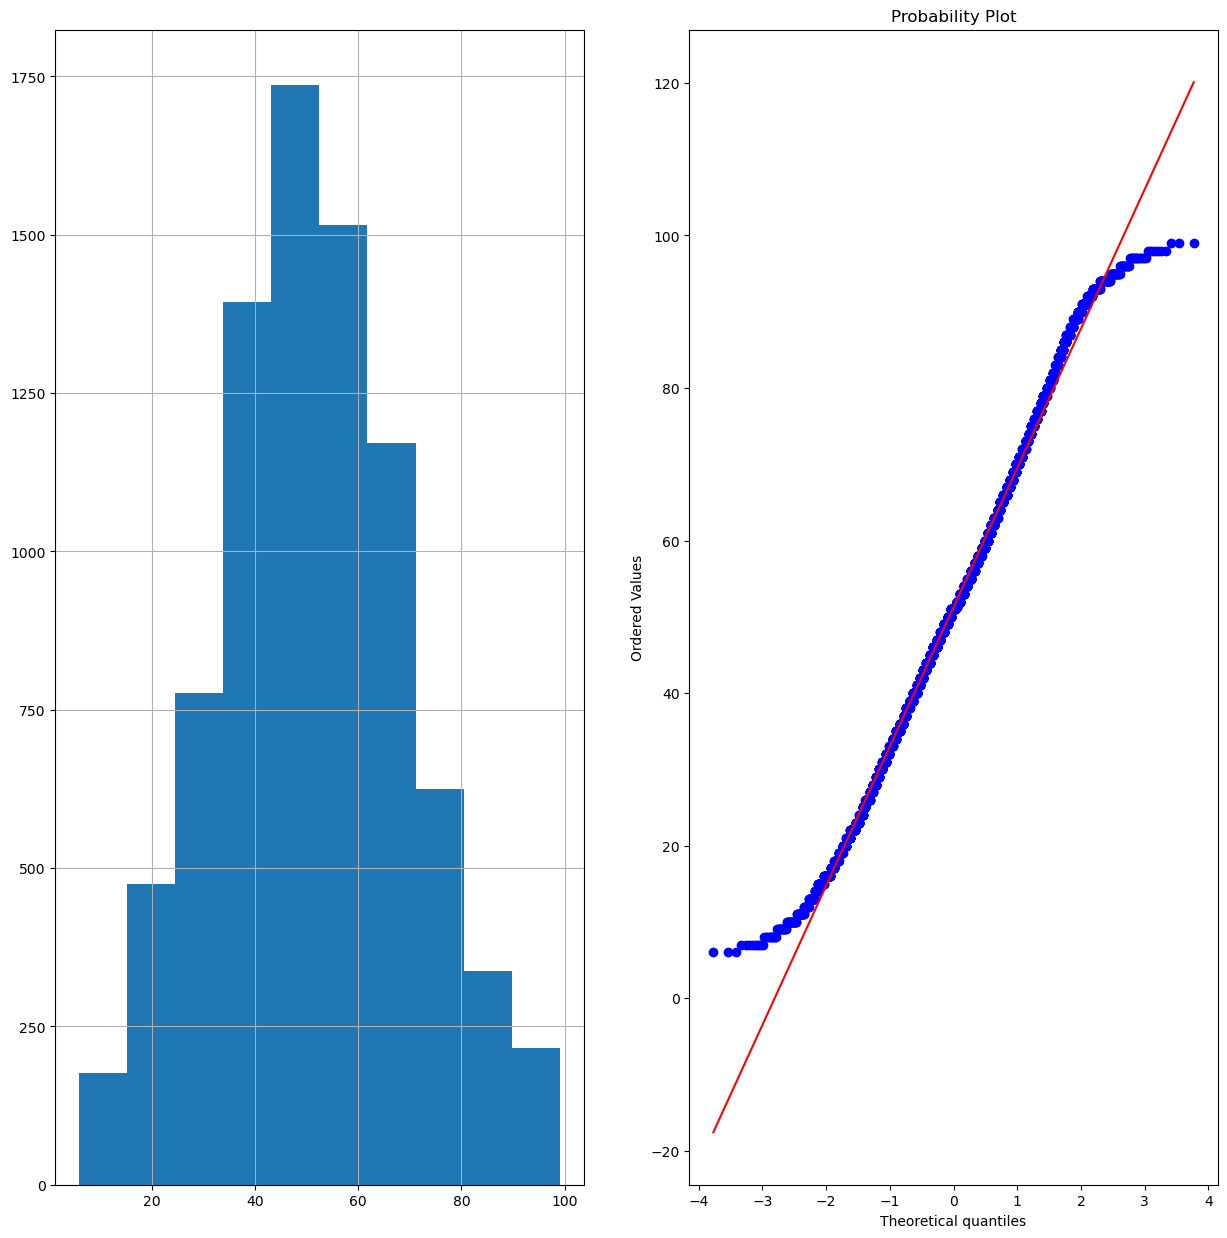

Pressure9am


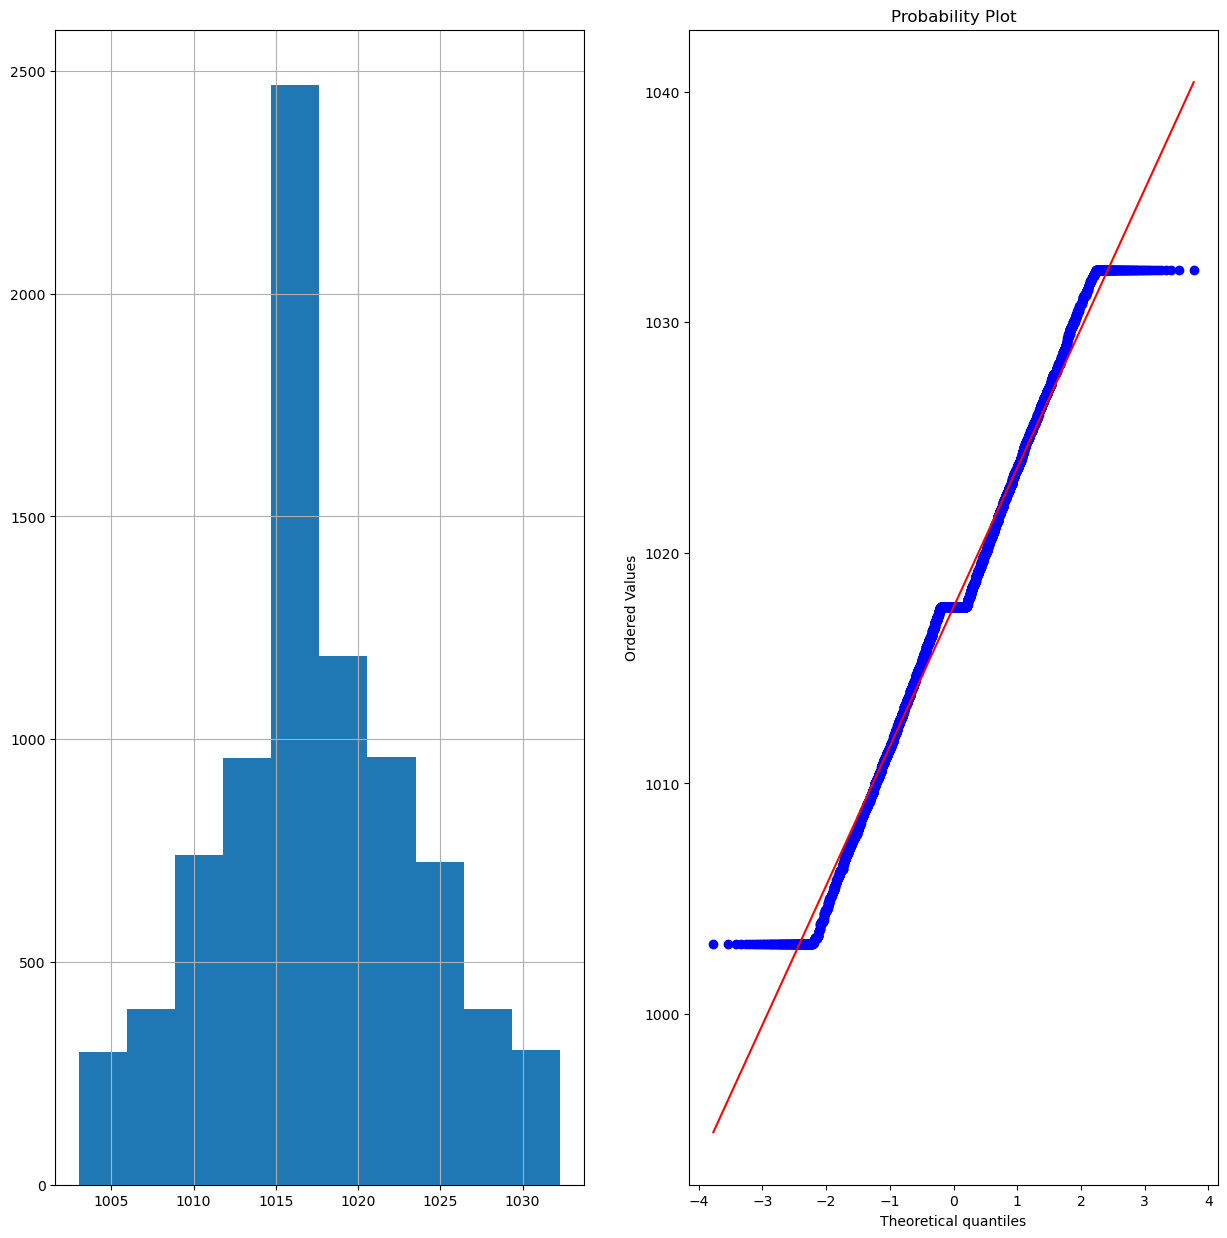

Pressure3pm


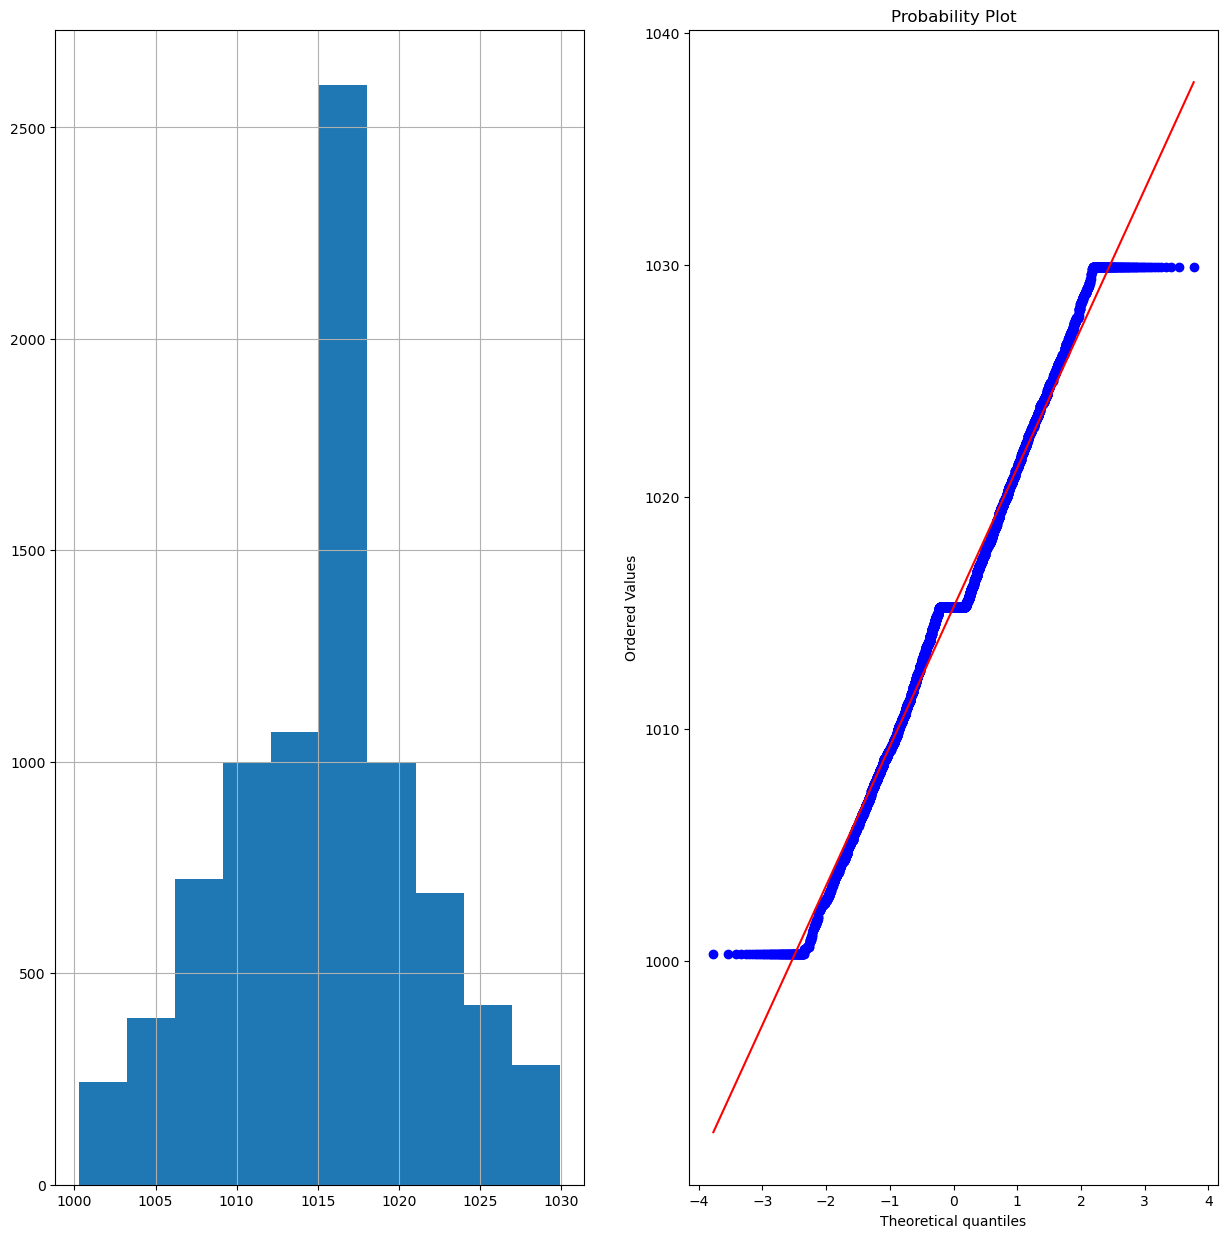

Temp9am


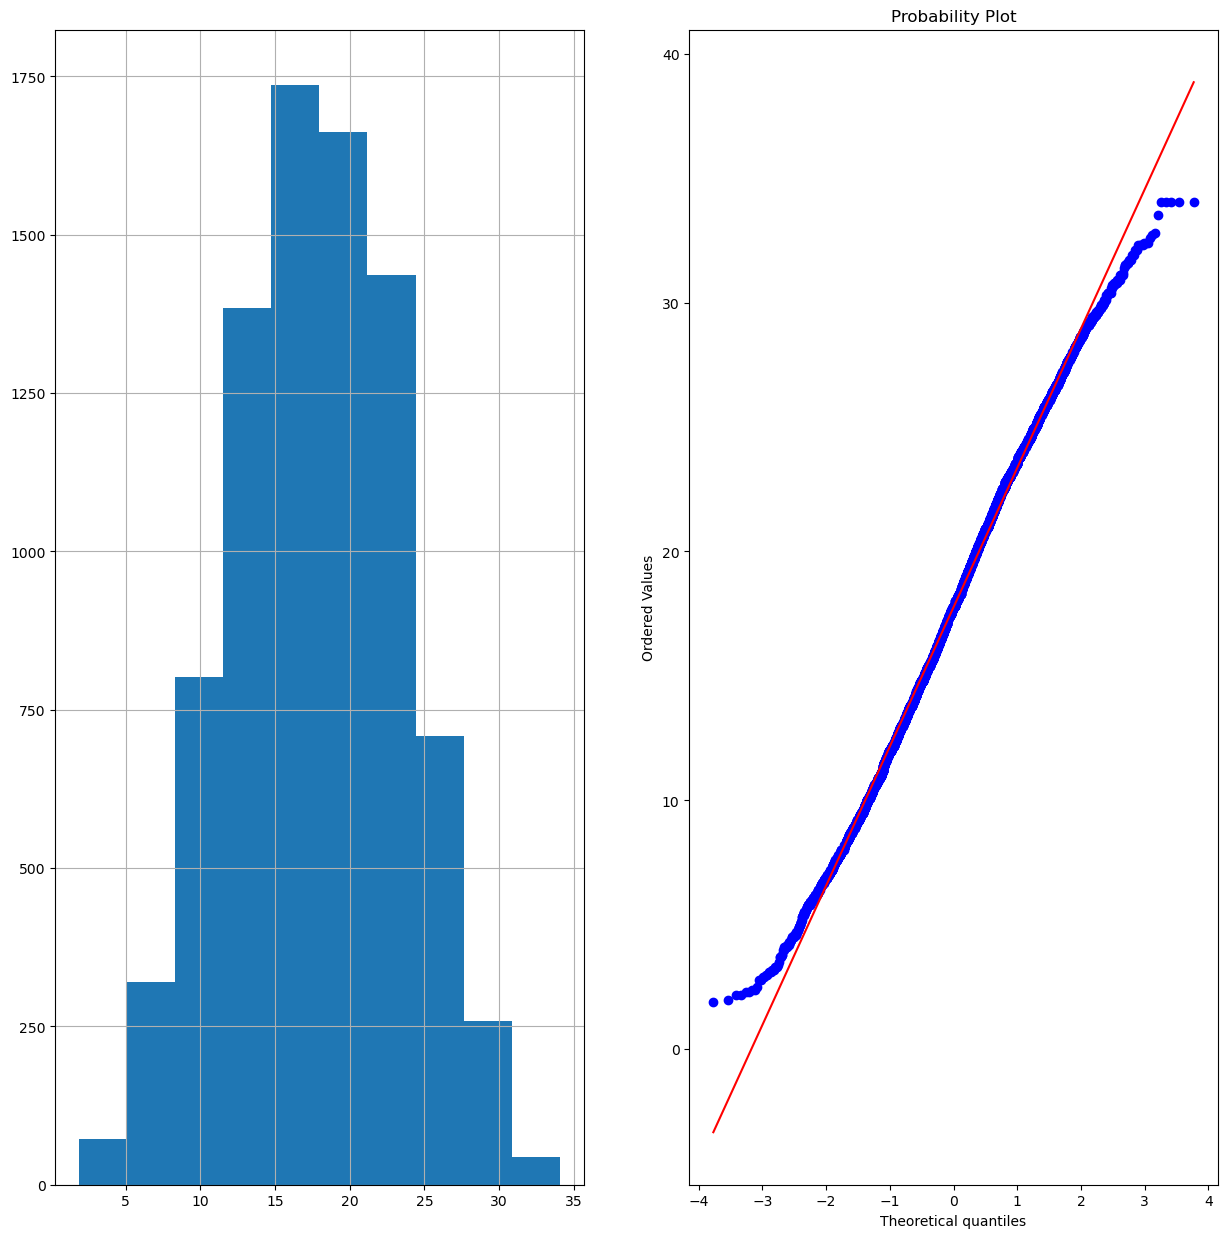

Temp3pm


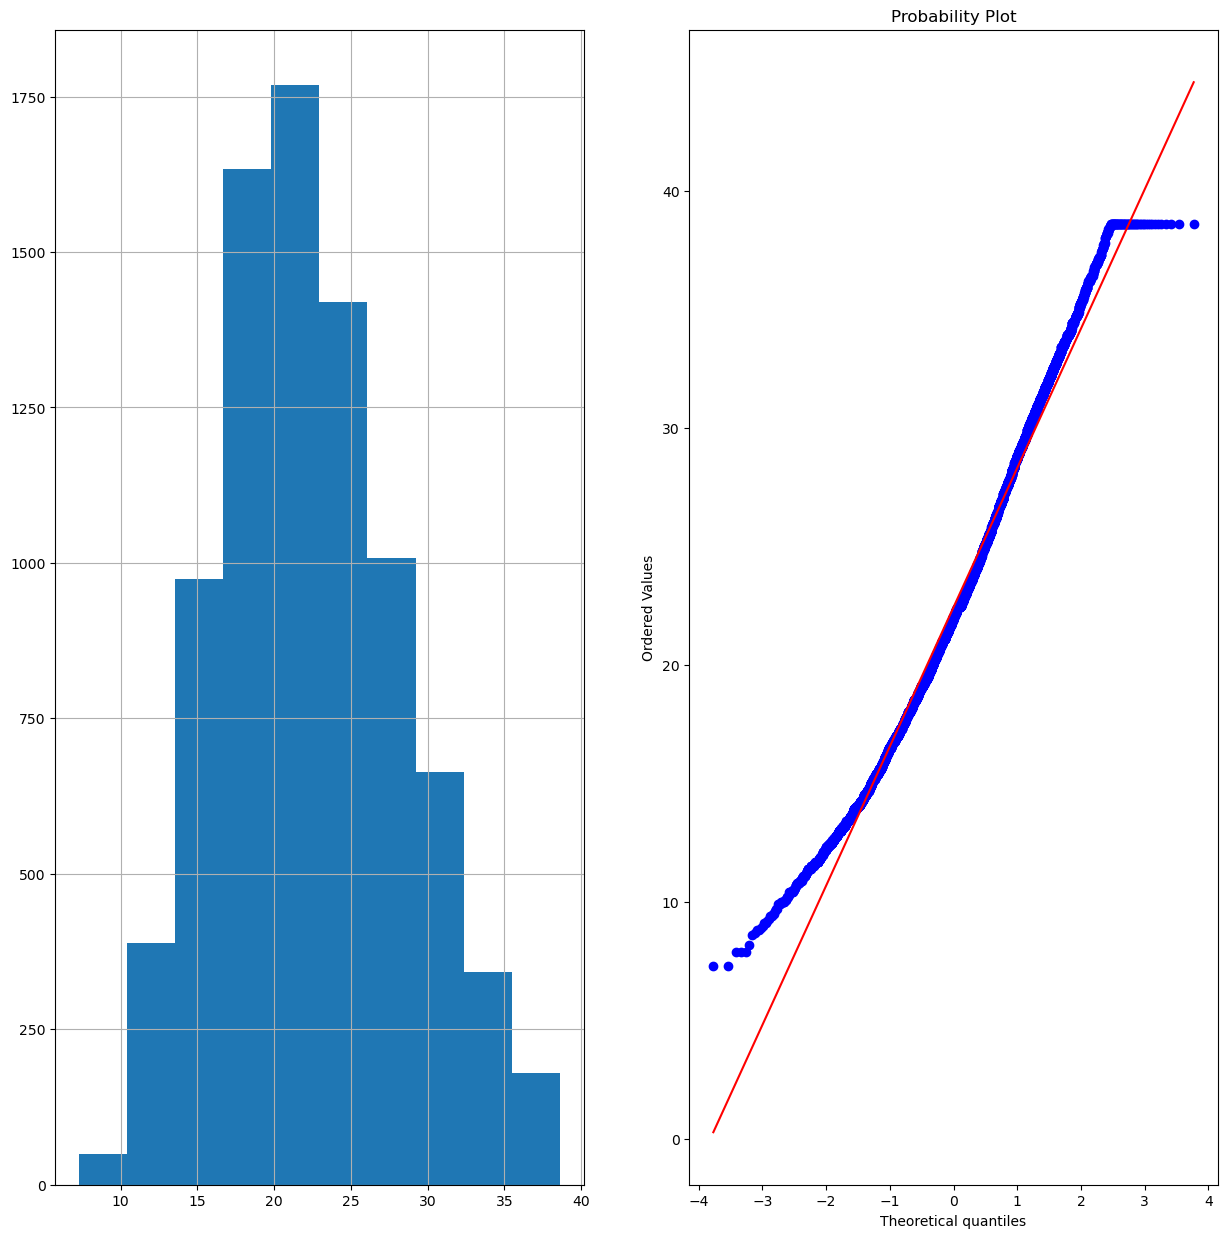

In [325]:
import scipy.stats as stats
for i in Continous_feature:
    print(i)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    df[i].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.show()

In [356]:
#!pip install pandas-profiling

In [355]:
#from pandas_profiling import ProfileReport
#prof=ProfileReport(df)
#prof.to_file(output_file="Report.html")

In [339]:
X=df.drop(["RainTomorrow","Date"],axis=1)
Y=df["RainTomorrow"]

In [342]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=24)

In [343]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day,Date_year
7529,8,2.7,19.4,0.0,1.916331,10.000000,16,40.174469,16,5,...,1027.6,1024.0,3.000000,2.000000,11.5,18.8,0,8,16,2012
7837,8,8.5,18.7,0.8,2.600000,6.400000,1,28.000000,3,3,...,1023.8,1021.7,3.000000,7.000000,13.8,18.0,0,8,18,2013
5541,5,9.2,23.0,0.0,1.916331,8.300000,3,70.000000,3,3,...,1025.4,1019.1,7.000000,4.000000,11.6,22.2,0,5,3,2010
6556,2,17.6,28.7,0.2,6.000000,8.200000,10,30.000000,15,11,...,1016.0,1012.4,1.000000,4.000000,23.3,27.7,0,4,1,2012
4114,10,20.7,25.7,3.5,5.389113,7.630483,10,48.000000,11,10,...,1008.6,1011.0,8.000000,8.000000,21.8,24.3,1,1,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,8,16.1,28.7,0.0,7.472782,10.804276,2,56.000000,2,0,...,1016.7,1012.5,1.000000,0.000000,19.8,27.8,0,3,15,2012
6500,2,19.9,31.7,0.0,5.800000,10.804276,0,24.000000,12,1,...,1003.7,1000.3,3.000000,2.000000,26.4,30.3,0,2,5,2012
5249,5,11.3,18.1,0.8,1.916331,5.726207,12,31.000000,12,8,...,1016.5,1016.7,6.000000,7.000000,14.6,17.0,0,11,3,2011
3473,11,17.5,24.6,0.0,5.389113,7.630483,3,28.000000,5,4,...,1011.2,1008.2,4.566622,4.503601,22.0,24.1,0,1,6,2009


In [344]:
y_test

8159    0
2519    1
5536    1
5315    1
3227    0
       ..
2779    0
993     0
6052    0
7132    0
1355    1
Name: RainTomorrow, Length: 1685, dtype: int64

In [347]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [348]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [349]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
y_prediction = lr.predict(X_test)
accuracy_score(y_test,y_prediction)

0.7198813056379822

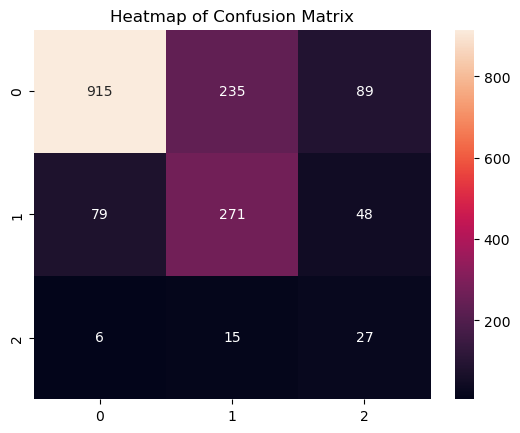

In [350]:
cm = confusion_matrix(y_test,y_prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [352]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1239
           1       0.52      0.68      0.59       398
           2       0.16      0.56      0.25        48

    accuracy                           0.72      1685
   macro avg       0.53      0.66      0.55      1685
weighted avg       0.80      0.72      0.75      1685



# Random forest

In [357]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8771513353115727

In [358]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1239
           1       0.83      0.64      0.72       398
           2       0.90      0.79      0.84        48

    accuracy                           0.88      1685
   macro avg       0.87      0.80      0.83      1685
weighted avg       0.87      0.88      0.87      1685



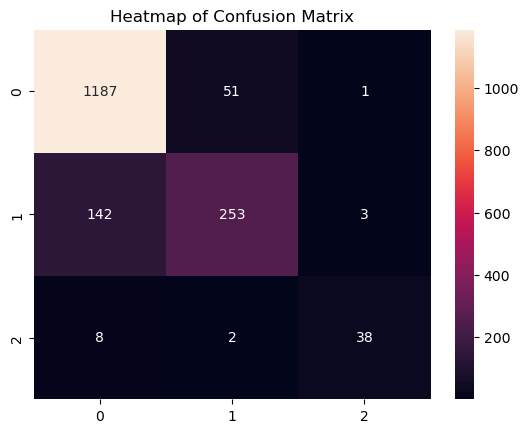

In [359]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()